# The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Input variables:
   # Bank client data:
   1 - age (numeric)

   2 - job : type of job (categorical: "admin.","unknown","unemployed",  "management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")

   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)

   4 - education (categorical: "unknown","secondary","primary","tertiary")

   5 - default: has credit in default? (binary: "yes","no")

   6 - balance: average yearly balance, in euros (numeric)

   7 - housing: has housing loan? (binary: "yes","no")

   8 - loan: has personal loan? (binary: "yes","no")

   # related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular")

  10 - day: last contact day of the month (numeric)

  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")

  12 - duration: last contact duration, in seconds (numeric)
   # other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)

  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)

  15 - previous: number of contacts performed before this campaign and for this client (numeric)

  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  Output variable (desired target):
  
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/BANK/bank-full.csv', sep=';')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

### Y = has the client subscribed a term deposit?

In [ ]:
df.shape

(45211, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [ ]:
df.describe(include='all').T

count unique          top   freq         mean          std  \
age        45211.0    NaN          NaN    NaN     40.93621    10.618762   
job          45211     12  blue-collar   9732          NaN          NaN   
marital      45211      3      married  27214          NaN          NaN   
education    45211      4    secondary  23202          NaN          NaN   
default      45211      2           no  44396          NaN          NaN   
balance    45211.0    NaN          NaN    NaN  1362.272058  3044.765829   
housing      45211      2          yes  25130          NaN          NaN   
loan         45211      2           no  37967          NaN          NaN   
contact      45211      3     cellular  29285          NaN          NaN   
day        45211.0    NaN          NaN    NaN    15.806419     8.322476   
month        45211     12          may  13766          NaN          NaN   
duration   45211.0    NaN          NaN    NaN    258.16308   257.527812   
campaign   45211.0    NaN          NaN    NaN     2.763841     3.098021   
pdays      45211.0    NaN          NaN    NaN    40.197828   100.128746   
previous   45211.0    NaN          NaN    NaN     0.580323     2.303441   
poutcome     45211      4      unknown  36959          NaN          NaN   
y            45211      2           no  39922          NaN          NaN   

              min    25%    50%     75%       max  
age          18.0   33.0   39.0    48.0      95.0  
job           NaN    NaN    NaN     NaN       NaN  
marital       NaN    NaN    NaN     NaN       NaN  
education     NaN    NaN    NaN     NaN       NaN  
default       NaN    NaN    NaN     NaN       NaN  
balance   -8019.0   72.0  448.0  1428.0  102127.0  
housing       NaN    NaN    NaN     NaN       NaN  
loan          NaN    NaN    NaN     NaN       NaN  
contact       NaN    NaN    NaN     NaN       NaN  
day           1.0    8.0   16.0    21.0      31.0  
month         NaN    NaN    NaN     NaN       NaN  
duration      0.0  103.0  180.0   319.0    4918.0  
campaign      1.0    1.0    2.0     3.0      63.0  
pdays        -1.0   -1.0   -1.0    -1.0     871.0  
previous      0.0    0.0    0.0     0.0     275.0  
poutcome      NaN    NaN    NaN     NaN       NaN  
y             NaN    NaN    NaN     NaN       NaN

In [ ]:
df.isna().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## There no Null Value present in dataset

# Univariate Analysis

In [ ]:
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [ ]:
df['y'].value_counts()

y
no     39922
yes     5289
Name: count, dtype: int64

# 1) Age

In [ ]:
df['age'].describe()

count    45211.000000
mean        40.936210
std         10.618762
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max         95.000000
Name: age, dtype: float64

<Axes: xlabel='age', ylabel='Count'>

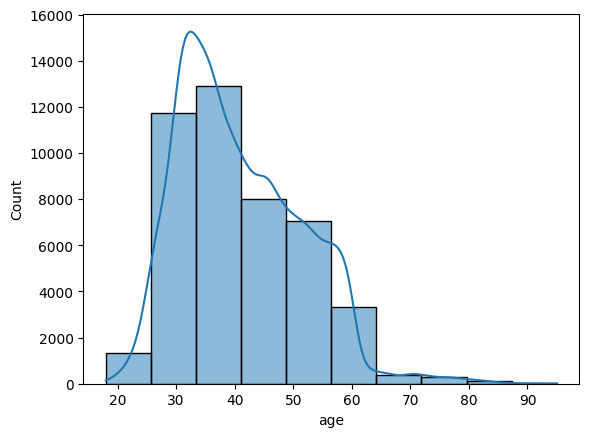

In [ ]:
sns.histplot(df['age'], kde=True, bins=10)

In [ ]:
skewness_value = df['age'].skew()
print(f'Skewness of Age: {skewness_value}')

Skewness of Age: 0.6848179257252598


<Axes: ylabel='age'>

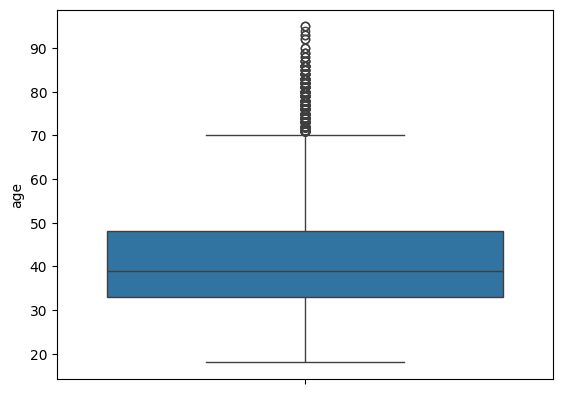

In [ ]:
sns.boxplot(df['age'])

#### 50% of the age group falls within the 35-50 range.

# 2) Job

In [ ]:
df['job'].value_counts(normalize=True)*100

job
blue-collar      21.525735
management       20.919688
technician       16.803433
admin.           11.437482
services          9.188029
retired           5.007631
self-employed     3.492513
entrepreneur      3.289023
unemployed        2.882042
housemaid         2.742695
student           2.074716
unknown           0.637013
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='job'>

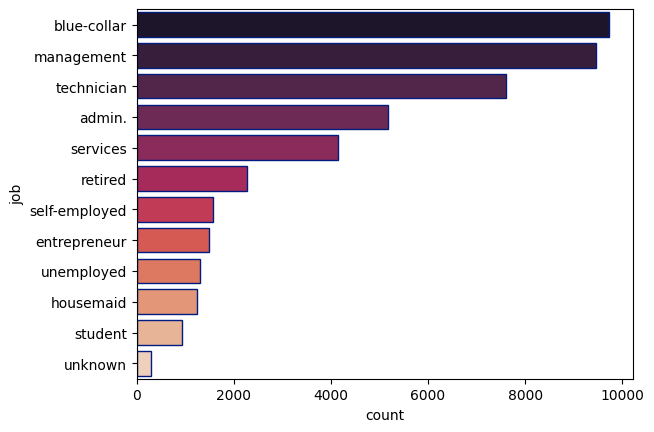

In [ ]:
sns.barplot(y=df['job'].value_counts().index, x=df['job'].value_counts(), palette='rocket', edgecolor=sns.color_palette('dark', 3), orient = 'h')

### A large percentage of phone calls were made to blue-collar, management, and technician workers.

# 3) Marital Status

In [ ]:
marital = df['marital'].value_counts(normalize=True)
marital

marital
married     0.601933
single      0.282896
divorced    0.115171
Name: proportion, dtype: float64

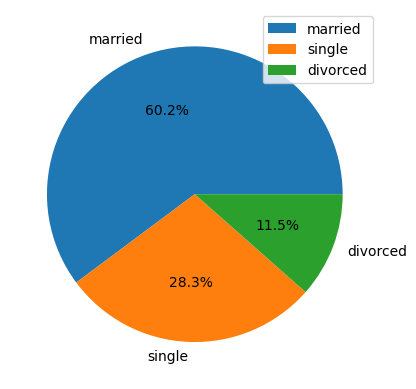

In [ ]:
plt.pie(marital.values, labels=marital.index,autopct='%1.1f%%')
plt.legend(marital.index)
plt.show()

# 4) Education

In [ ]:
df['education'].value_counts()

education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64

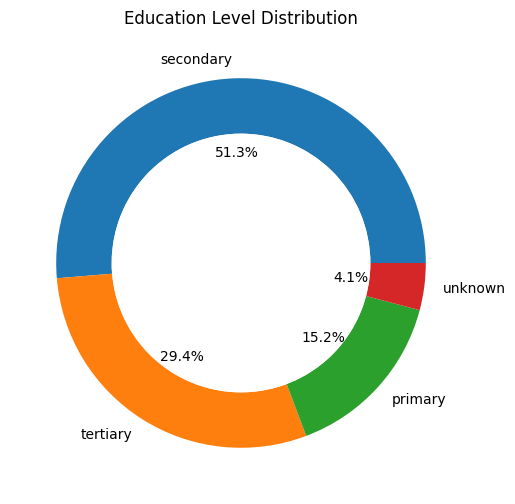

In [ ]:
plt.figure(figsize=(8, 6))
education_counts = df['education'].value_counts()
plt.pie(education_counts.values, labels=education_counts.index, autopct='%1.1f%%',wedgeprops=dict(width=0.3))
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(center_circle)
plt.title('Education Level Distribution')
plt.show()

# 5) Has Credit in Default

## In banking, the phrase "has credit in default" refers to a situation where a borrower has failed to meet the terms of their loan or credit agreement. Specifically, it means the borrower has not made the required payments (such as monthly installments) on time, and the loan or credit account is now considered "in default."

In [ ]:
df['default'].value_counts(normalize=True)*100

default
no     98.197341
yes     1.802659
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='default'>

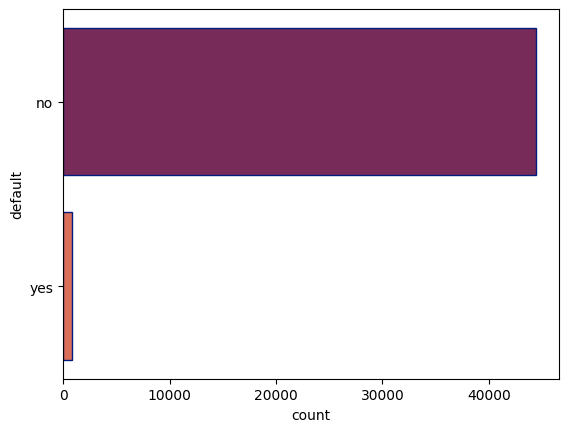

In [ ]:
sns.barplot(y=df['default'].value_counts().index, x=df['default'].value_counts(), palette='rocket', edgecolor=sns.color_palette('dark', 3))

# 6) Housing: has housing loan?

In [ ]:
df['housing'].value_counts(normalize=True)*100

housing
yes    55.583818
no     44.416182
Name: proportion, dtype: float64

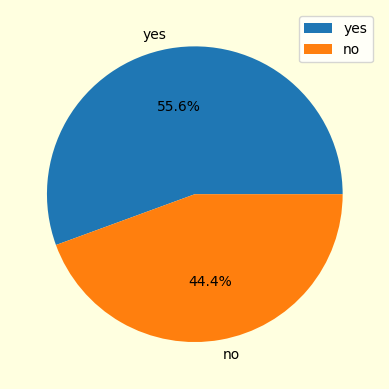

In [ ]:
plt.figure(facecolor='lightyellow')
plt.pie(df['housing'].value_counts().values, labels=df['housing'].value_counts().index, autopct='%1.1f%%') # Removed palettes= as it's not a valid argument
plt.legend(df['housing'].value_counts().index, loc='best')

plt.show()

# 7) Loan:has personal loan?

In [ ]:
df['loan'].value_counts(normalize=True)*100

loan
no     83.977351
yes    16.022649
Name: proportion, dtype: float64

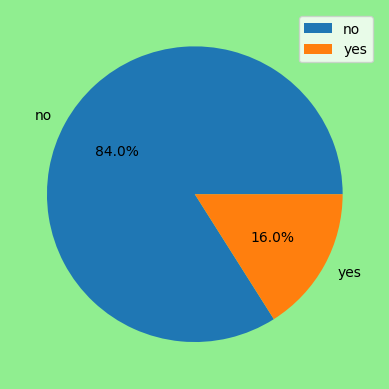

In [ ]:
plt.figure(facecolor='lightgreen')
plt.pie(df['loan'].value_counts().values, labels=df['loan'].value_counts().index, autopct='%1.1f%%')
plt.legend(df['loan'].value_counts().index, loc='best')

plt.show()

# 8) Balance: average yearly balance, in euros

### Balance column provides an indication of how much the account holder maintains on average throughout the year.

In [ ]:
df['balance'].describe()

count     45211.000000
mean       1362.272058
std        3044.765829
min       -8019.000000
25%          72.000000
50%         448.000000
75%        1428.000000
max      102127.000000
Name: balance, dtype: float64

<Axes: ylabel='balance'>

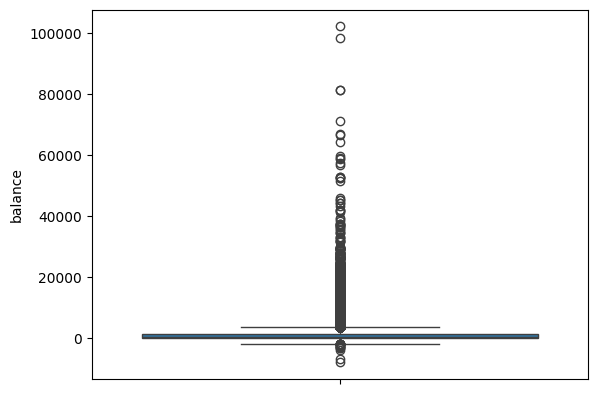

In [ ]:
sns.boxplot(df['balance'])

<Axes: xlabel='balance', ylabel='Count'>

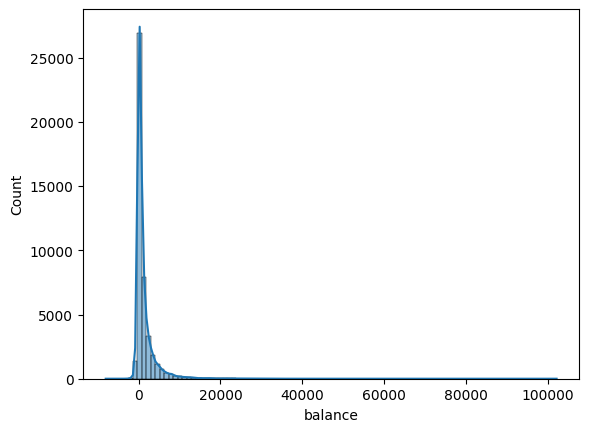

In [ ]:
sns.histplot(df['balance'], kde=True, bins=100)

# 9) Contact : Communication Type

In [ ]:
df['contact'].value_counts()

contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64

<Axes: xlabel='count', ylabel='contact'>

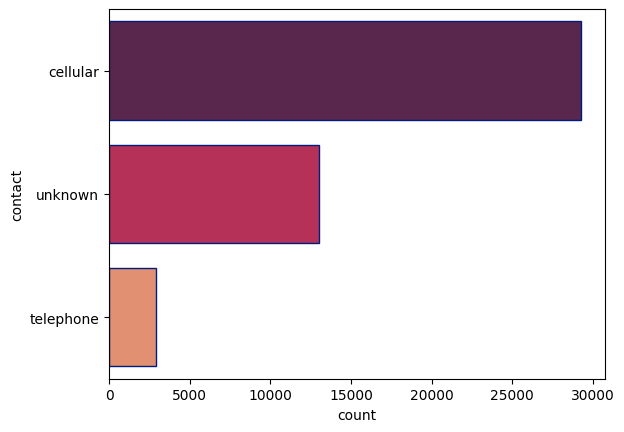

In [ ]:
sns.barplot(y=df['contact'].value_counts().index, x=df['contact'].value_counts(), palette='rocket', edgecolor=sns.color_palette('dark', 3))

# 10) Day: last contact day of the month.

In [ ]:
df['day'].value_counts(normalize=True).head(10)*100

day
20    6.087014
18    5.104952
21    4.481210
17    4.288779
6     4.273296
5     4.224636
14    4.087501
8     4.074230
28    4.047688
7     4.018933
Name: proportion, dtype: float64

<Axes: xlabel='day', ylabel='Count'>

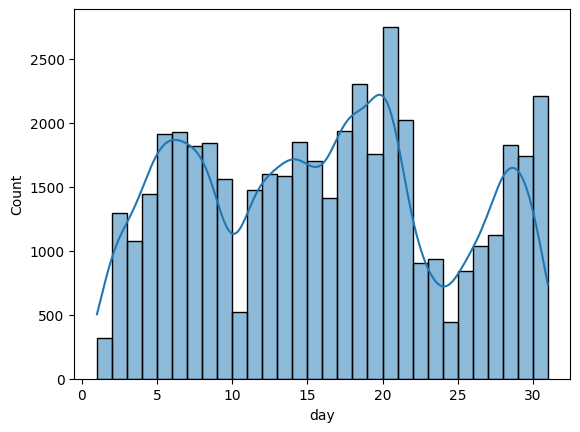

In [ ]:
sns.histplot(df['day'], kde=True, bins=30)

There are noticeable peaks around certain days (e.g., around day 5, 10, 20, and 30), indicating possibly planned or recurring high-contact days within the campaign.
There is a significant drop in calls around day 1 and day 24, suggesting fewer activities in the campaign.

# 11) Month: last contact month of year

In [ ]:
month_df = df['month'].value_counts(normalize=True)*100
month_df

month
may    30.448342
jul    15.250713
aug    13.817434
jun    11.813497
nov     8.781049
apr     6.485147
feb     5.859194
jan     3.103227
oct     1.632346
sep     1.280662
mar     1.055053
dec     0.473336
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='month'>

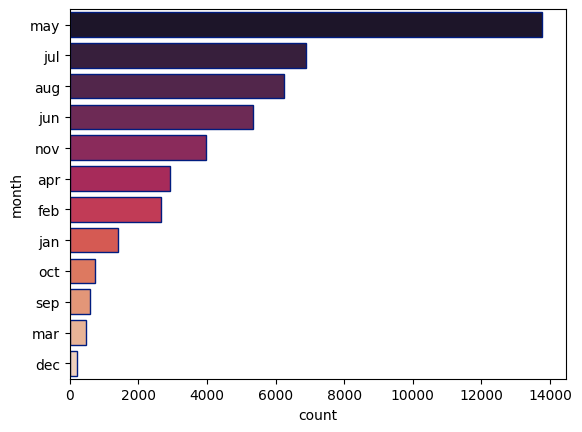

In [ ]:
sns.barplot(y=df['month'].value_counts().index, x=df['month'].value_counts(), palette='rocket', edgecolor=sns.color_palette('dark', 3))

# 12) Duration: last contact duration, in seconds

In [ ]:
df['duration'].describe()

count    45211.000000
mean       258.163080
std        257.527812
min          0.000000
25%        103.000000
50%        180.000000
75%        319.000000
max       4918.000000
Name: duration, dtype: float64

<Axes: ylabel='duration'>

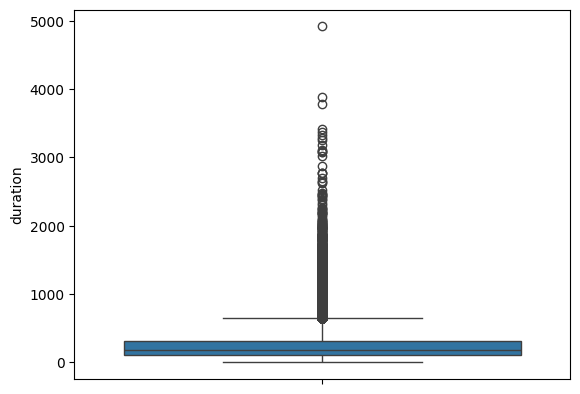

In [ ]:
sns.boxplot(df['duration'])

<Axes: xlabel='duration', ylabel='Count'>

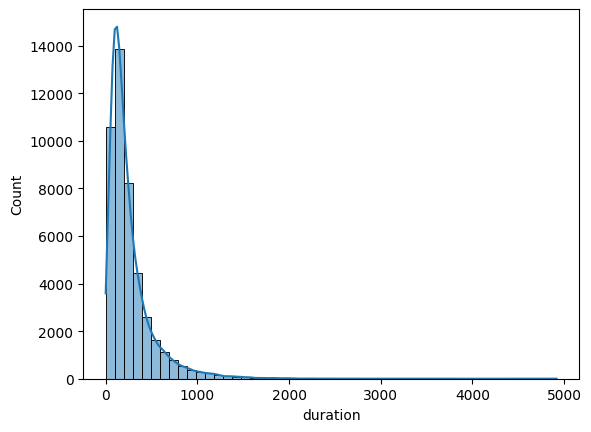

In [ ]:
sns.histplot(df['duration'], kde=True, bins=50)

In [ ]:
#Change the unit of 'duration' from seconds to minutes
df['duration'] = df['duration'].apply(lambda n:n/60).round(2)

In [ ]:
df['duration'].describe()

count    45211.000000
mean         4.302729
std          4.292132
min          0.000000
25%          1.720000
50%          3.000000
75%          5.320000
max         81.970000
Name: duration, dtype: float64

<Axes: ylabel='duration'>

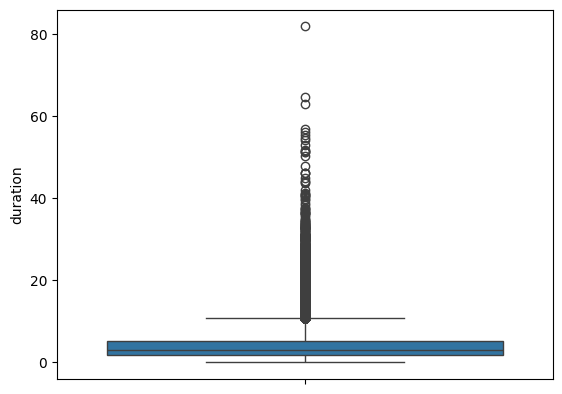

In [ ]:
sns.boxplot(df['duration'])

<Axes: xlabel='duration', ylabel='Count'>

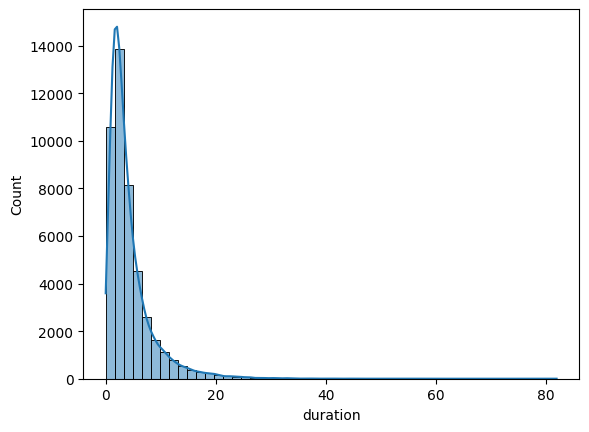

In [ ]:
sns.histplot(df['duration'], kde=True, bins=50)

# 13) campaign: number of contacts performed during this campaign and for this client

In [ ]:
df['campaign'].describe()

count    45211.000000
mean         2.763841
std          3.098021
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         63.000000
Name: campaign, dtype: float64

In [ ]:
df['campaign'].value_counts(normalize=True).head(10)*100

campaign
1     38.804716
2     27.659198
3     12.211630
4      7.790140
5      3.901705
6      2.855500
7      1.625711
8      1.194400
9      0.723275
10     0.588352
Name: proportion, dtype: float64

# 14) pdays: number of days that passed by after the client was last contacted from a previous campaign

In [ ]:
df['pdays'].describe()

count    45211.000000
mean        40.197828
std        100.128746
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         -1.000000
max        871.000000
Name: pdays, dtype: float64

In [ ]:
df['pdays'].value_counts(normalize=True)*100

pdays
-1      81.736745
 182     0.369379
 92      0.325142
 91      0.278693
 183     0.278693
          ...    
 449     0.002212
 452     0.002212
 648     0.002212
 595     0.002212
 530     0.002212
Name: proportion, Length: 559, dtype: float64

<Axes: xlabel='pdays', ylabel='Count'>

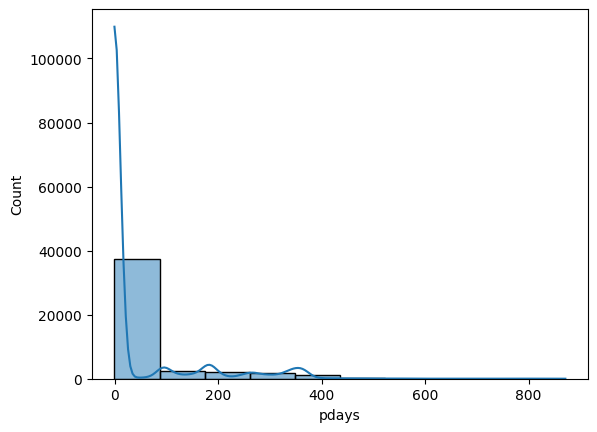

In [ ]:
sns.histplot(df['pdays'], kde=True, bins=10)

# 15) previous: number of contacts performed before this campaign and for this client

In [ ]:
df['previous'].describe()

count    45211.000000
mean         0.580323
std          2.303441
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        275.000000
Name: previous, dtype: float64

In [ ]:
df['previous'].value_counts(normalize=True).head(10)*100

previous
0    81.736745
1     6.131251
2     4.658158
3     2.525934
4     1.579262
5     1.015240
6     0.612683
7     0.453429
8     0.285329
9     0.203490
Name: proportion, dtype: float64

<Axes: ylabel='previous'>

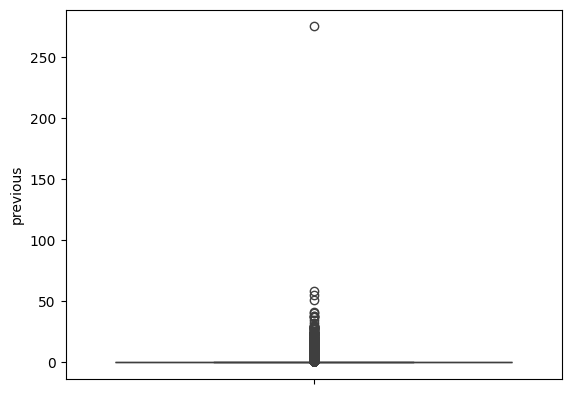

In [ ]:
sns.boxplot(df['previous'])

# 16) Outcome of Previous Campaigns

In [ ]:
df['poutcome'].value_counts(normalize=True)*100

poutcome
unknown    81.747805
failure    10.840282
other       4.069806
success     3.342107
Name: proportion, dtype: float64

<Axes: xlabel='count', ylabel='poutcome'>

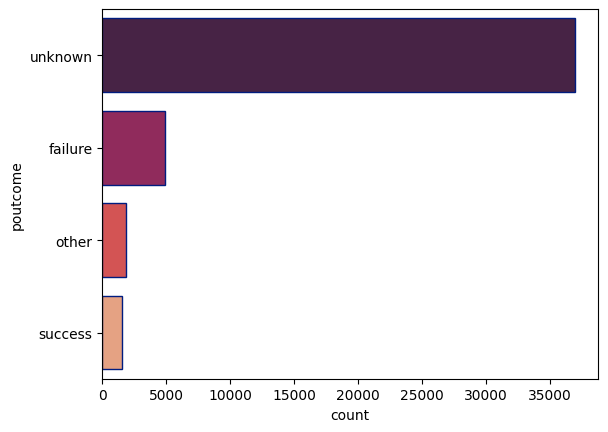

In [ ]:
sns.barplot(y=df['poutcome'].value_counts().index, x=df['poutcome'].value_counts(), palette='rocket', edgecolor=sns.color_palette('dark', 3))

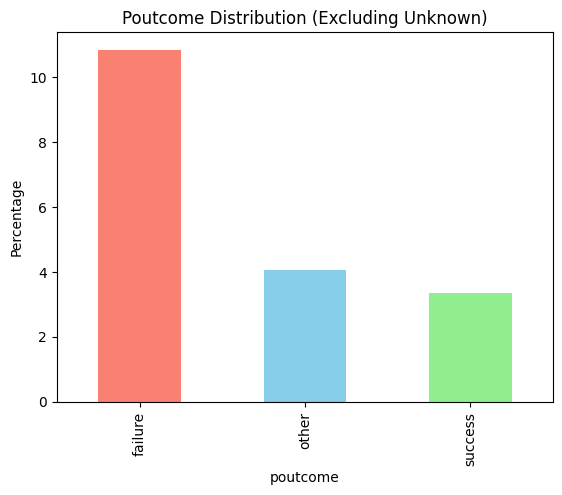

In [ ]:
poutcome_counts = df['poutcome'].value_counts(normalize=True).drop('unknown') * 100
poutcome_counts.plot(kind='bar', color=['salmon', 'skyblue', 'lightgreen'])
plt.title('Poutcome Distribution (Excluding Unknown)')
plt.ylabel('Percentage')
plt.show()

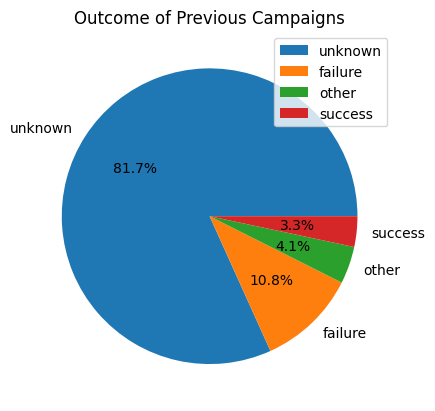

In [ ]:
plt.pie(df['poutcome'].value_counts().values, labels=df['poutcome'].value_counts().index, autopct='%1.1f%%')
plt.legend(df['poutcome'].value_counts().index)
plt.title('Outcome of Previous Campaigns')
plt.show()

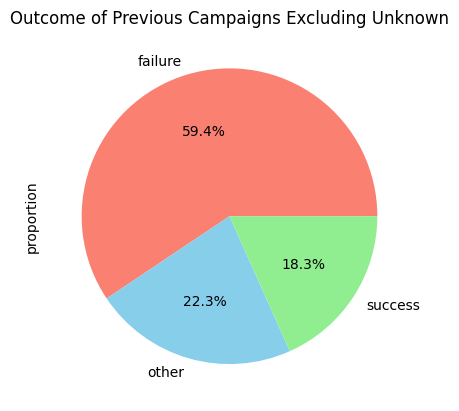

In [ ]:
poutcome_counts.plot(kind='pie', autopct='%1.1f%%', colors=['salmon', 'skyblue', 'lightgreen'])
plt.title('Outcome of Previous Campaigns Excluding Unknown')
plt.show()

# 17) Subscribed a term deposit

In [ ]:
df['y'].value_counts(normalize=True)*100

y
no     88.30152
yes    11.69848
Name: proportion, dtype: float64

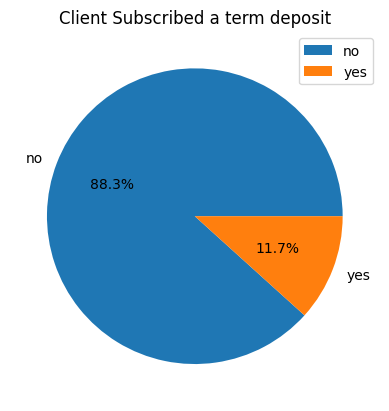

In [ ]:
plt.pie(df['y'].value_counts().values, labels=df['y'].value_counts().index, autopct='%1.1f%%')
plt.legend(df['y'].value_counts().index)
plt.title('Client Subscribed a term deposit')
plt.show()

Observations

  Non-subscribers make up 88.3%, while those who subscribed account for 11.7%. This shows that the dataset is quite imbalanced, so careful selection of appropriate metrics will be necessary during model evaluation.

# ***Observations:Univariate***

  There are no missing values.

  Negative values are observed in the annual average salary, which requires further investigation.

  There are outliers in the call duration.

  The campaign column also contains extreme values, necessitating additional analysis.

  There is a variety of data types (binary, categorical, numerical), which will require encoding in later stages.

  The variance between columns is large, so normalization will be needed for model training.

# Bi-Variate Analysis

# 18) Age VS Subscription

In [ ]:
df['age'].groupby(df['y']).describe().T

y                no          yes
count  39922.000000  5289.000000
mean      40.838986    41.670070
std       10.172662    13.497781
min       18.000000    18.000000
25%       33.000000    31.000000
50%       39.000000    38.000000
75%       48.000000    50.000000
max       95.000000    95.000000

Text(0.5, 1.0, 'Age vs Subscribed')

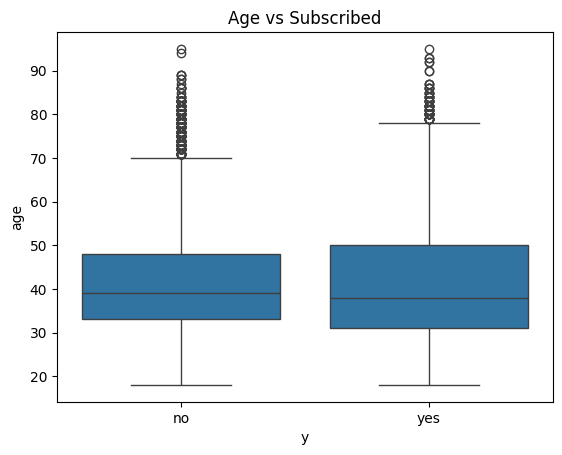

In [ ]:
sns.boxplot(x=df['y'], y=df['age'])
plt.title("Age vs Subscribed")

Summary

The boxplot shows that the median age of people who subscribed to the product is higher than the median age of people who did not subscribe. There are also more outliers in the age of people who subscribed, suggesting that there is more variation in the ages of subscribers. However, the difference in the medians is not very large, so age alone is unlikely to be a strong predictor of whether or not someone will subscribe.

# 19) Job vs Subscription

In [ ]:
job_y = pd.crosstab(df['job'], df['y'])
job_y

y                no   yes
job                      
admin.         4540   631
blue-collar    9024   708
entrepreneur   1364   123
housemaid      1131   109
management     8157  1301
retired        1748   516
self-employed  1392   187
services       3785   369
student         669   269
technician     6757   840
unemployed     1101   202
unknown         254    34

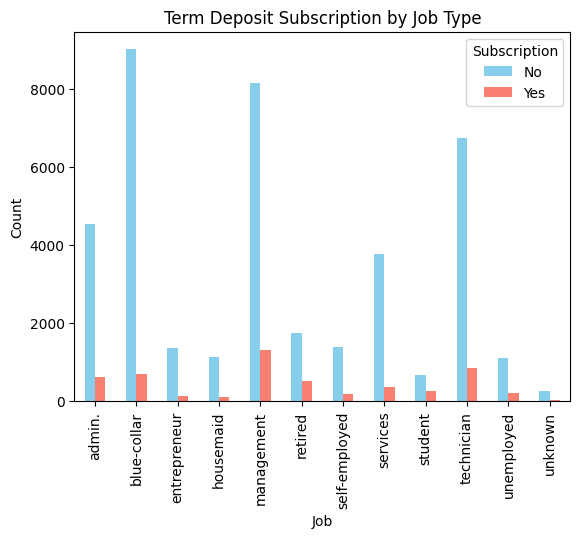

In [ ]:
job_y.plot(kind='bar', color=['skyblue', 'salmon'])
plt.xlabel('Job')
plt.ylabel('Count')
plt.title('Term Deposit Subscription by Job Type')
plt.legend(title='Subscription', labels=['No', 'Yes'])
plt.show()

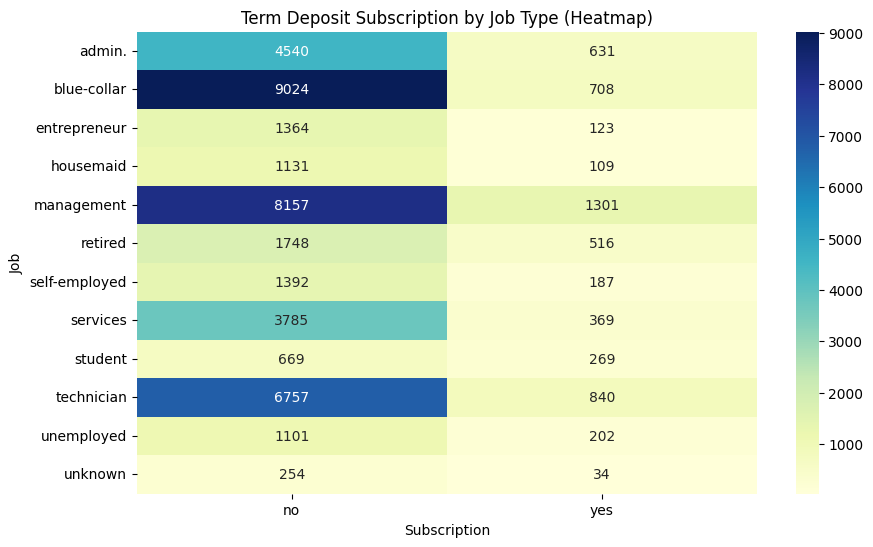

In [ ]:
plt.figure(figsize=(10, 6))
sns.heatmap(job_y, annot=True, fmt="d", cmap="YlGnBu")
plt.xlabel('Subscription')
plt.ylabel('Job')
plt.title('Term Deposit Subscription by Job Type (Heatmap)')
plt.show()


### The Blue collar and management are more likely to subscribe

# 20) Marital-Status VS Subscription

In [ ]:
mar = pd.crosstab(df['marital'], df['y'])
mar

y            no   yes
marital              
divorced   4585   622
married   24459  2755
single    10878  1912

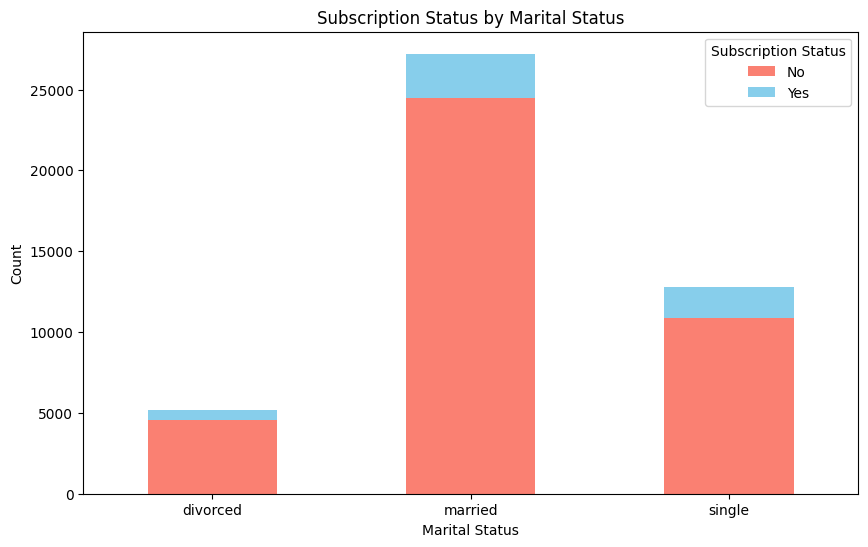

In [ ]:
marital_y_counts = df.groupby(['marital', 'y']).size().unstack(fill_value=0)
marital_y_counts.plot(kind='bar', stacked=True, figsize=(10, 6), color=['salmon', 'skyblue'])
plt.title('Subscription Status by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Subscription Status', labels=['No', 'Yes'])
plt.show()

## Most subscriptions are being taken by married individuals.Further Analysis needed.

# 21) Education VS Subscription

In [ ]:
df.groupby(['y', 'education']).size().unstack()


education  primary  secondary  tertiary  unknown
y                                               
no            6260      20752     11305     1605
yes            591       2450      1996      252

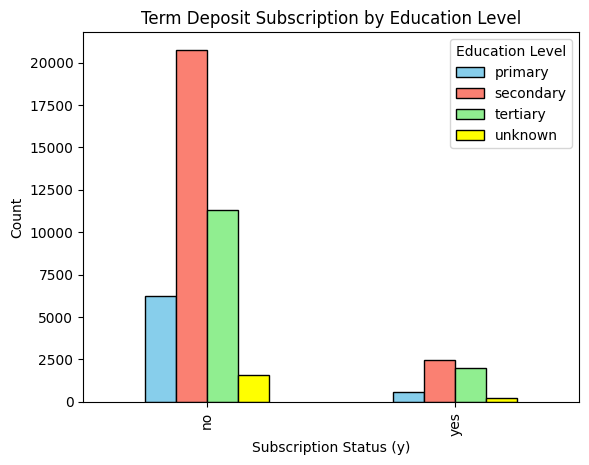

In [ ]:
education_y = df.groupby(['y', 'education']).size().unstack()
education_y.plot(kind='bar', color=['skyblue', 'salmon','lightgreen','yellow'], edgecolor='black')
plt.xlabel('Subscription Status (y)')
plt.ylabel('Count')
plt.title('Term Deposit Subscription by Education Level')
plt.legend(title='Education Level')
plt.show()


# 22) Default VS Subscription

In [ ]:
default_y = pd.crosstab(df['y'], df['default'])
default_y

default     no  yes
y                  
no       39159  763
yes       5237   52

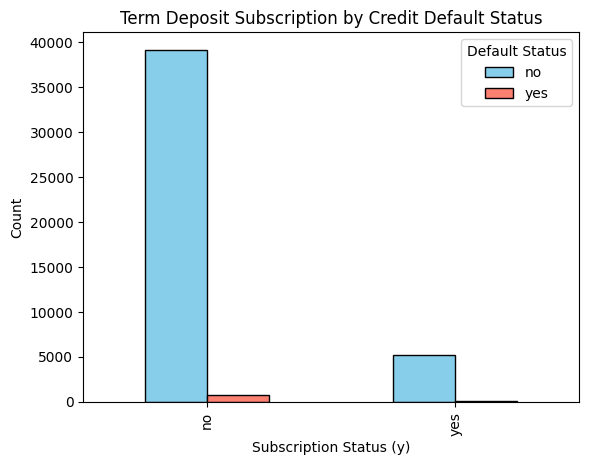

In [ ]:
default_y.plot(kind='bar', color=['skyblue', 'salmon'], edgecolor='black')
plt.xlabel('Subscription Status (y)')
plt.ylabel('Count')
plt.title('Term Deposit Subscription by Credit Default Status')
plt.legend(title='Default Status')
plt.show()



# 23) Previously Contacted VS Subscription

In [ ]:
df['pdays'].value_counts()

pdays
-1      36954
 182      167
 92       147
 91       126
 183      126
        ...  
 449        1
 452        1
 648        1
 595        1
 530        1
Name: count, Length: 559, dtype: int64

In [ ]:
#not previously contacted
df['pdays'] = df['pdays'].replace(-1, 0)

<Axes: xlabel='pdays', ylabel='Density'>

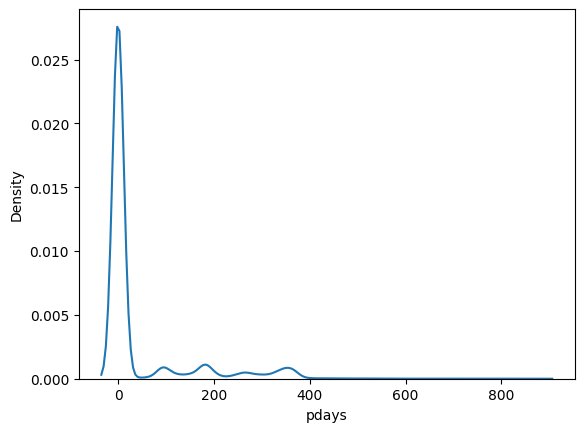

In [ ]:
sns.kdeplot(df['pdays'])

In [ ]:
bins = [ 0, 5, 10, 20, 30, 40]
labels = [ '0-5 Days', '6-10 Days', '11-20 Days', '21-30 Days', '31-40 Days']

df['pdays_binned'] = pd.cut(df['pdays'], bins=bins, labels=labels)
df['pdays_binned'].value_counts()


pdays_binned
0-5 Days      66
6-10 Days     60
31-40 Days    38
11-20 Days    34
21-30 Days    28
Name: count, dtype: int64

In [ ]:
df['pdays_binned'].isna().sum()

44985

In [ ]:
df['pdays_binned'] = df['pdays_binned'].cat.add_categories(['Not Contacted'])
df['pdays_binned'].fillna('Not Contacted', inplace=True)

In [ ]:
print(df['pdays_binned'].value_counts())

pdays_binned
Not Contacted    44985
0-5 Days            66
6-10 Days           60
31-40 Days          38
11-20 Days          34
21-30 Days          28
Name: count, dtype: int64


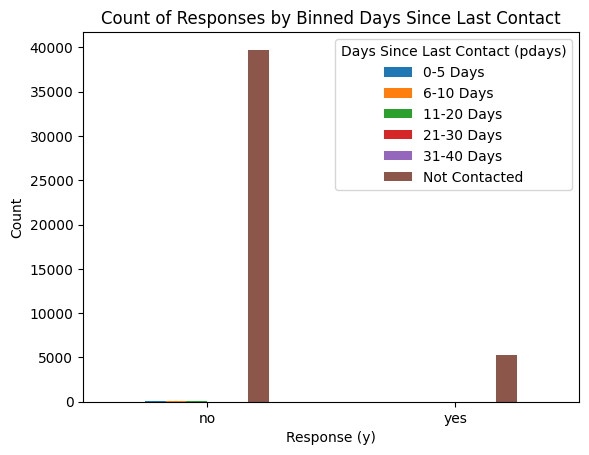

In [ ]:
days_y_binned = pd.crosstab(df['y'], df['pdays_binned'])
days_y_binned
days_y_binned

days_y_binned.plot(kind='bar')
plt.title('Count of Responses by Binned Days Since Last Contact')
plt.xlabel('Response (y)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Days Since Last Contact (pdays)')
plt.show()

# 24) Balance VS Subscription

In [ ]:
df['balance'].groupby(df['y']).describe().T

y                 no           yes
count   39922.000000   5289.000000
mean     1303.714969   1804.267915
std      2974.195473   3501.104777
min     -8019.000000  -3058.000000
25%        58.000000    210.000000
50%       417.000000    733.000000
75%      1345.000000   2159.000000
max    102127.000000  81204.000000

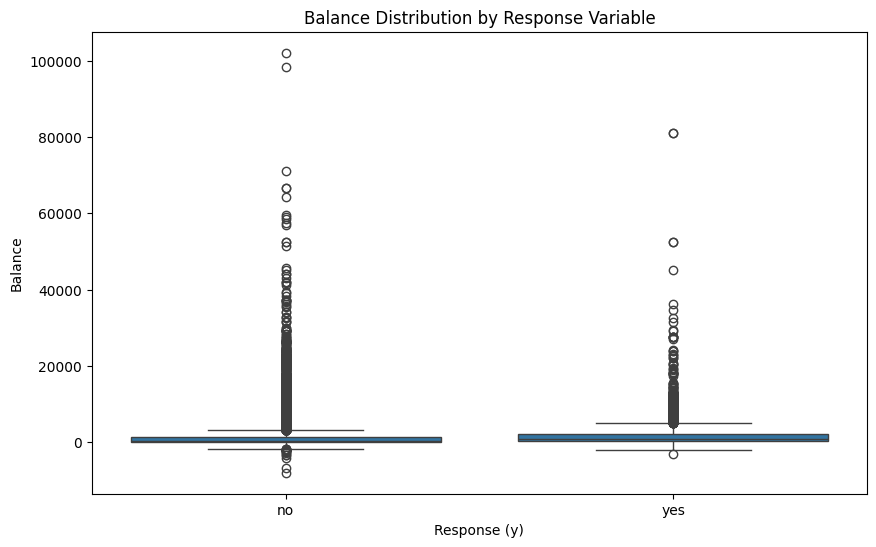

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='y', y='balance', data=df)
plt.title('Balance Distribution by Response Variable')
plt.xlabel('Response (y)')
plt.ylabel('Balance')
plt.show()

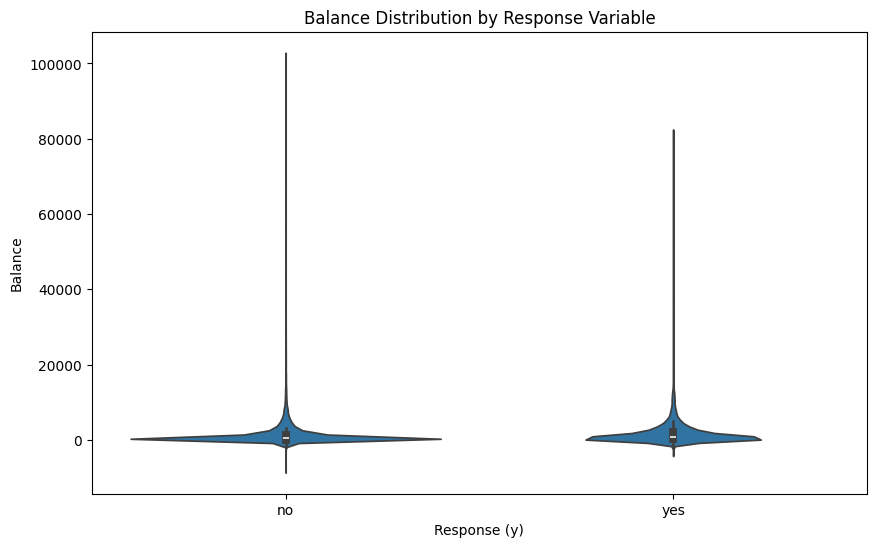

In [ ]:
plt.figure(figsize=(10, 6))
sns.violinplot(x='y', y='balance', data=df)
plt.title('Balance Distribution by Response Variable')
plt.xlabel('Response (y)')
plt.ylabel('Balance')
plt.show()

## It shows that customers who subscribed to a term deposit tend to have a higher balance

# 25) Housing_Loan VS Subscription

In [ ]:
housing = pd.crosstab(df['y'], df['housing'])
housing

housing     no    yes
y                    
no       16727  23195
yes       3354   1935

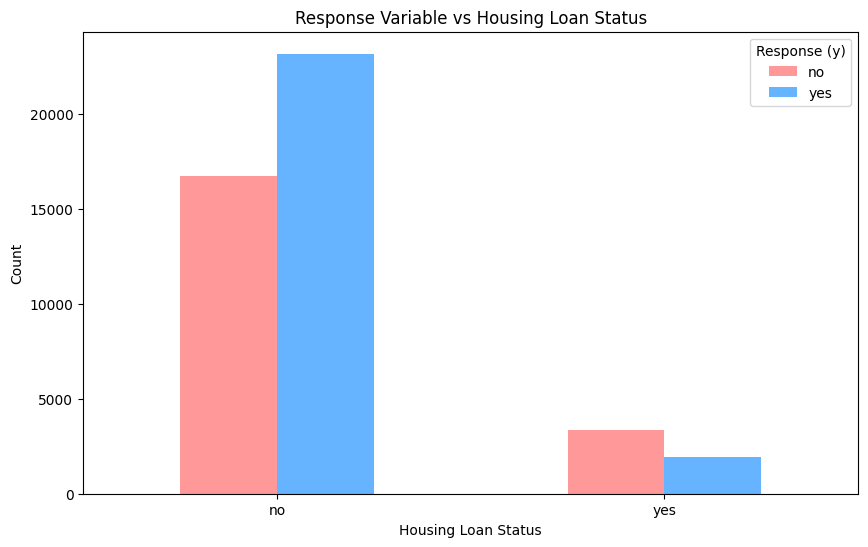

In [ ]:
housing.plot(kind='bar',  figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Response Variable vs Housing Loan Status')
plt.xlabel('Housing Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response (y)')
plt.show()

Text(0.5, 1.0, 'Housing Loan Status vs Subscribed')

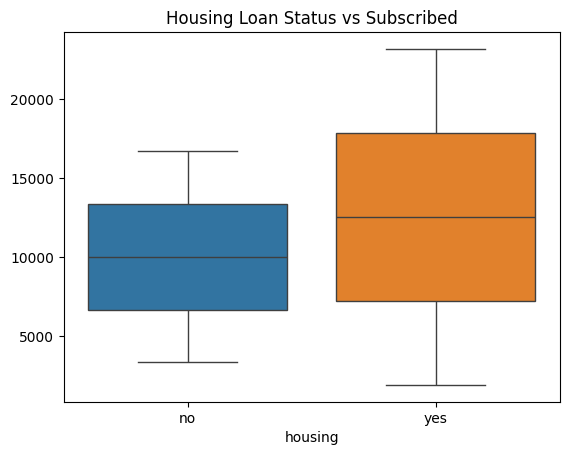

In [ ]:
sns.boxplot(housing)
plt.title("Housing Loan Status vs Subscribed")

Text(0.5, 1.0, 'Housing Loan Status vs Subscribed')

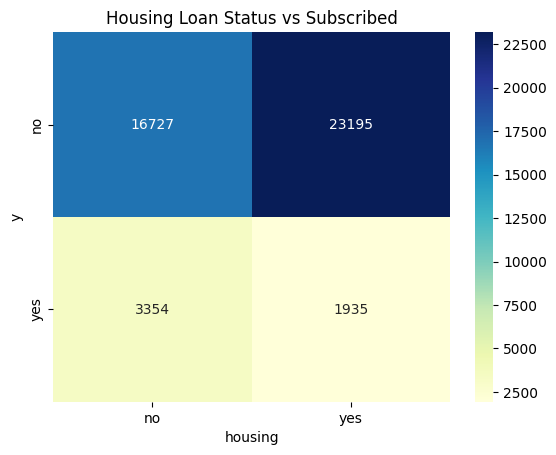

In [ ]:
sns.heatmap(housing, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Housing Loan Status vs Subscribed")

###  The boxplot suggests that customers with a housing loan tend to subscribe to higher amounts than those without a housing loan. It also suggests that there is more variability in subscribed amounts for customers with a housing loan.

# 26) Loan VS Subscription

In [ ]:
loan = pd.crosstab(df['y'], df['loan'])
loan

loan     no   yes
y                
no    33162  6760
yes    4805   484

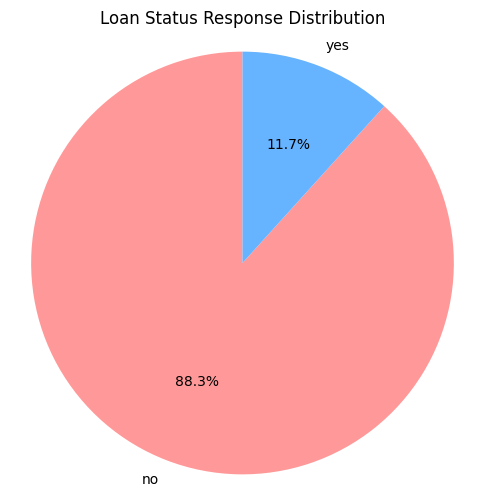

In [ ]:
total_counts = loan.sum(axis=1)
plt.figure(figsize=(6,6))
plt.pie(total_counts, labels=total_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999', '#66b3ff'])
plt.title('Loan Status Response Distribution')
plt.axis('equal')
plt.show()

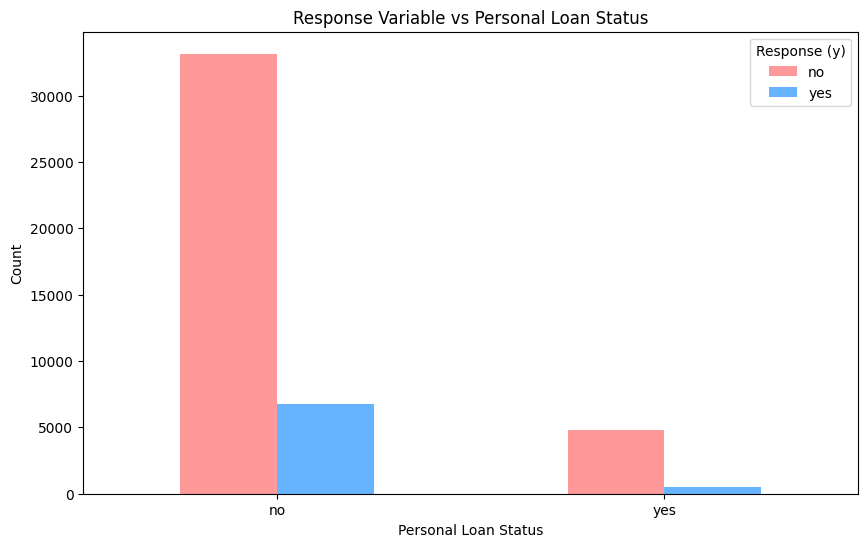

In [ ]:
# Plotting grouped bar chart
loan.plot(kind='bar', figsize=(10, 6), color=['#ff9999', '#66b3ff'])
plt.title('Response Variable vs Personal Loan Status')
plt.xlabel('Personal Loan Status')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Response (y)', loc='upper right')
plt.show()


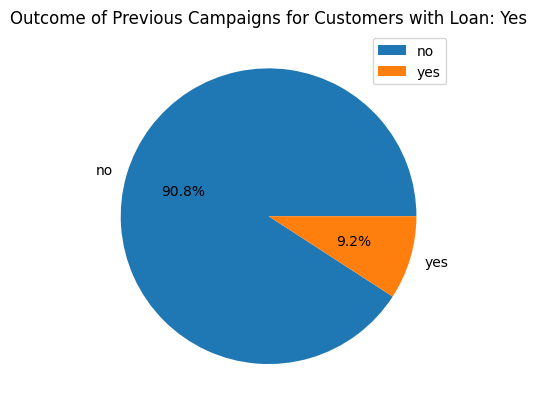

In [ ]:
loan_yes = loan.loc['yes']
plt.pie(loan_yes.values, labels=loan_yes.index, autopct='%1.1f%%')
plt.legend(loan_yes.index)
plt.title('Outcome of Previous Campaigns for Customers with Loan: Yes')
plt.show()

By examining the sizes of the slices, you can quickly see how many customers with loans accepted the offer versus those who declined it. This can provide insights into customer behavior and the effectiveness of the previous campaign for those who took loans.

# 27) Contact Medium VS Subscription

In [ ]:
pd.crosstab(df['y'],df['contact'])

contact  cellular  telephone  unknown
y                                    
no          24916       2516    12490
yes          4369        390      530

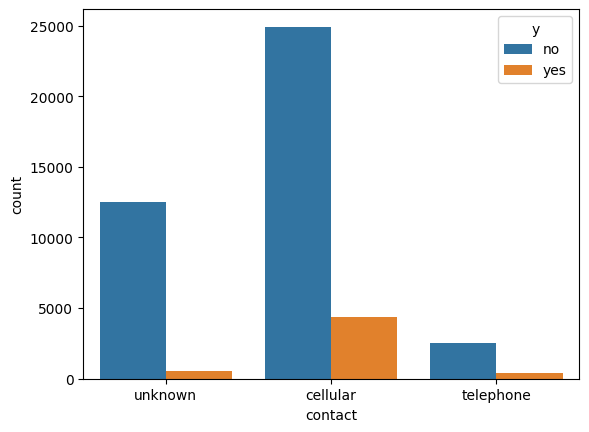

In [ ]:
sns.countplot(x=df['contact'], hue=df['y'])
plt.show()

### . The contact method "cellular" is the most popular contact method and the majority of customers with this contact method did not subscribe to a term deposit.

# 28) Day of the Month VS Subscription

In [ ]:
pd.crosstab(df['y'],df['day'])

day   1     2    3     4     5     6     7     8     9    10  ...   22   23  \
y                                                             ...             
no   232  1111  901  1215  1695  1751  1660  1641  1382  403  ...  751  813   
yes   90   182  178   230   215   181   157   201   179  121  ...  154  126   

day   24   25   26   27    28    29    30   31  
y                                               
no   385  707  919  971  1687  1616  1295  597  
yes   62  133  116  150   143   129   271   46  

[2 rows x 31 columns]

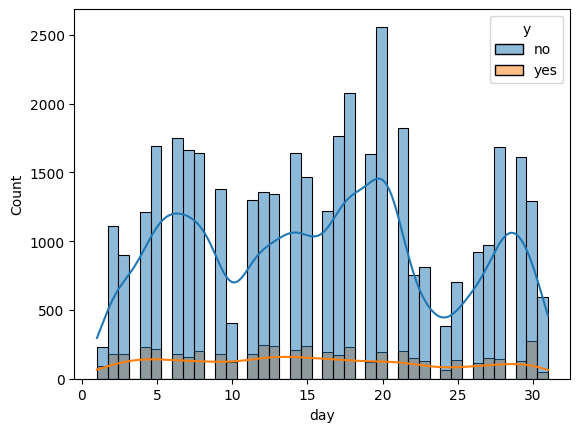

In [ ]:
sns.histplot(x=df['day'], hue=df['y'], kde=True)
plt.show()

In [ ]:
df['date'] = pd.to_datetime(df['month'] + ' ' + df['day'].astype(str) + ' 2024', format='%b %d %Y')
df['weekday'] = df['date'].dt.day_name()
df.drop(columns=['date'], inplace=True)
df['weekday']

0        Sunday
1        Sunday
2        Sunday
3        Sunday
4        Sunday
          ...  
45206    Sunday
45207    Sunday
45208    Sunday
45209    Sunday
45210    Sunday
Name: weekday, Length: 45211, dtype: object

In [ ]:
df['weekday'].value_counts()

weekday
Monday       8973
Tuesday      8937
Sunday       8701
Wednesday    8104
Thursday     5506
Saturday     3746
Friday       1244
Name: count, dtype: int64

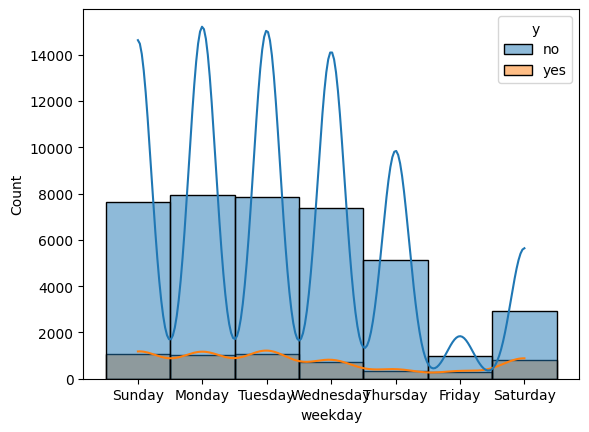

In [ ]:
sns.histplot(x=df['weekday'], hue=df['y'], kde=True)
plt.show()

# 29) Month VS Subscription

In [ ]:
pd.crosstab(df['y'],df['month'])

month   apr   aug  dec   feb   jan   jul   jun  mar    may   nov  oct  sep
y                                                                         
no     2355  5559  114  2208  1261  6268  4795  229  12841  3567  415  310
yes     577   688  100   441   142   627   546  248    925   403  323  269

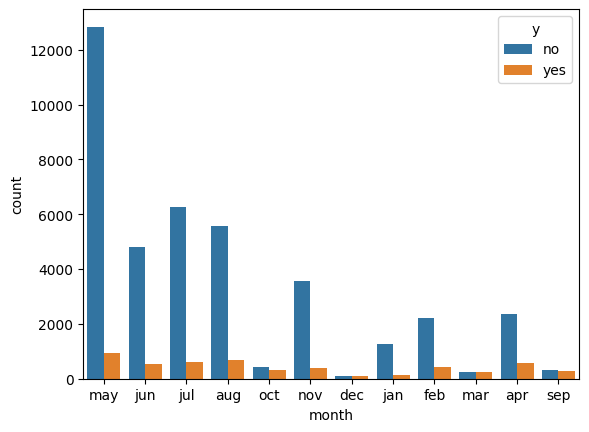

In [ ]:
sns.countplot(x=df['month'], hue=df['y'])
plt.show()

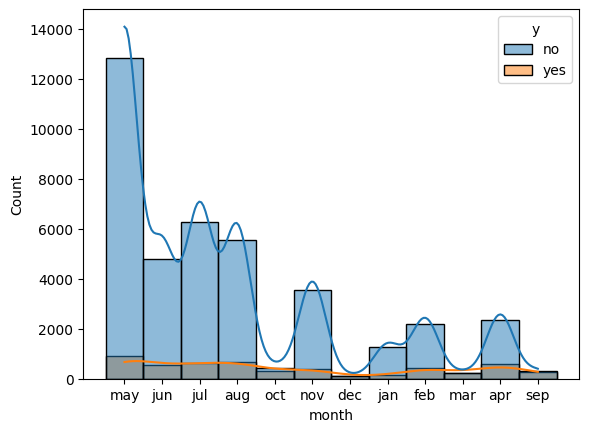

In [ ]:
sns.histplot(x=df['month'], hue=df['y'], kde=True)
plt.show()

### most of call were made in second quarter of the year

# 30) Duration in Seconds VS Subscription

In [ ]:
pd.crosstab(df['y'],df['duration'])

duration  0.00   0.02   0.03   0.05   0.07   0.08   0.10   0.12   0.13   \
y                                                                         
no            3      2      3      4     15     35     45     73     84   
yes           0      0      0      0      0      0      0      0      1   

duration  0.15   ...  51.70  53.05  54.22  54.73  55.37  56.10  57.03  63.08  \
y                ...                                                           
no           77  ...      0      0      0      1      1      1      1      1   
yes           0  ...      1      1      1      0      0      0      0      0   

duration  64.68  81.97  
y                       
no            0      1  
yes           1      0  

[2 rows x 1573 columns]

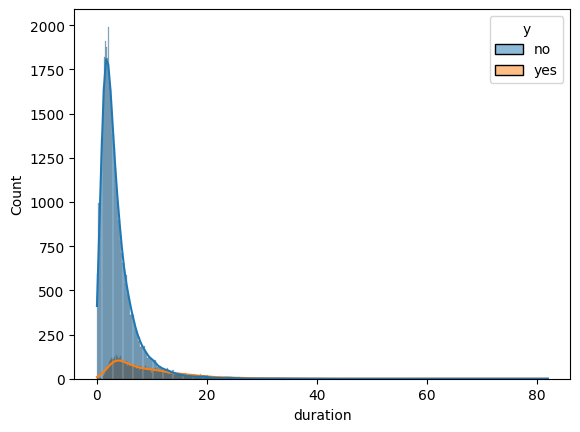

In [ ]:
sns.histplot(x=df['duration'], hue=df['y'], kde=True)
plt.show()

In [ ]:
bins = [0,500, 1000, 1500, 2000, 2500, 3000, 3500,4000,4500,5000]
labels = ['Not Contacted','500-1000', '1000-1500', '1500-2000', '2000-2500', '2500-3000','3000-3500','3500-4000','4000-4500','4500-5000']
df['duration_binned'] = pd.cut(df['duration'], bins=bins, labels=labels)
duration_y_binned = pd.crosstab(df['y'], df['duration_binned'])

<Figure size 2000x1000 with 0 Axes>

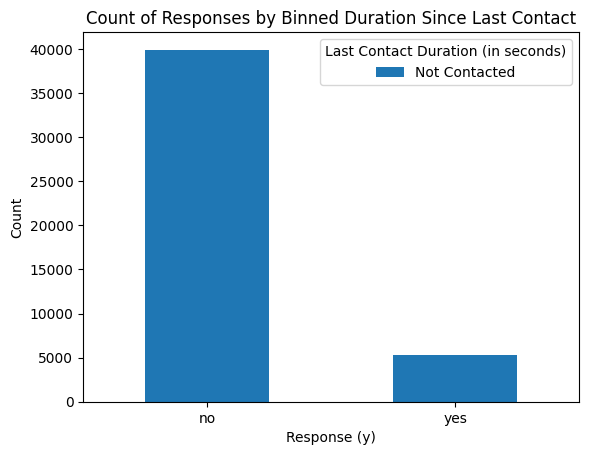

In [ ]:
plt.figure(figsize=(20, 10))
duration_y_binned.plot(kind='bar')
plt.title('Count of Responses by Binned Duration Since Last Contact')
plt.xlabel('Response (y)')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Last Contact Duration (in seconds)', loc='upper right')
plt.show()

In [ ]:
df['duration_binned'].isnull().sum()

3

In [ ]:
df['duration_binned'].fillna('Not Contacted', inplace=True)

# 31) Campaign VS Subscription

In [ ]:
pd.crosstab(df['y'],df['campaign'])

campaign     1      2     3     4     5     6    7    8    9    10  ...  39  \
y                                                                   ...       
no        14983  11104  4903  3205  1625  1199  688  508  306  252  ...   1   
yes        2561   1401   618   317   139    92   47   32   21   14  ...   0   

campaign  41  43  44  46  50  51  55  58  63  
y                                             
no         2   3   1   1   2   1   1   1   1  
yes        0   0   0   0   0   0   0   0   0  

[2 rows x 48 columns]

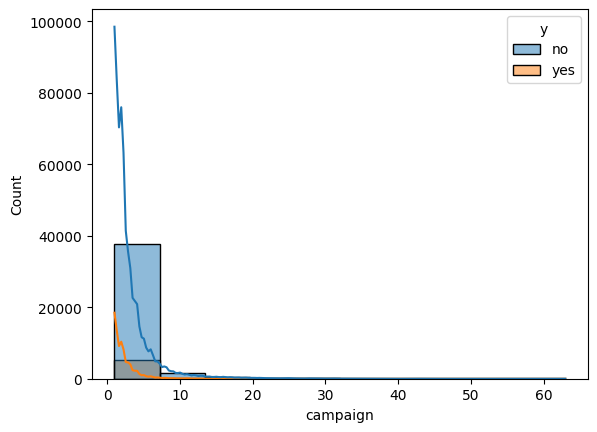

In [ ]:
sns.histplot(x=df['campaign'], hue=df['y'], kde=True, bins=10)
plt.show()

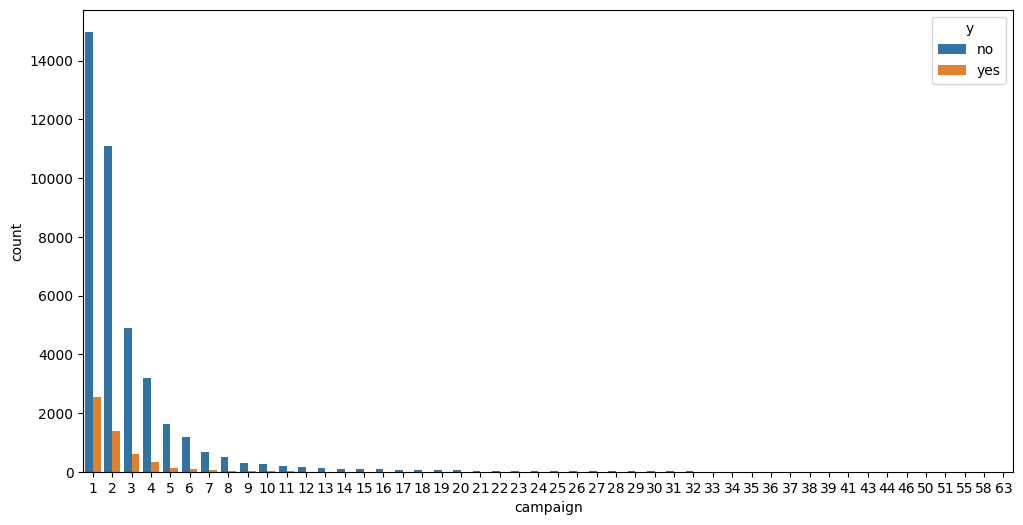

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x=df['campaign'], hue=df['y'])
plt.show()

### Initial campaigns had most of the calls

# 32) Previous VS Subscription

In [ ]:
previous = pd.crosstab(df['y'],df['previous'])
previous

previous    0     1     2    3    4    5    6    7    8    9    ...  32   35   \
y                                                               ...             
no        33570  2189  1650  848  543  338  194  151   90   68  ...    1    1   
yes        3384   583   456  294  171  121   83   54   39   24  ...    0    0   

previous  37   38   40   41   51   55   58   275  
y                                                 
no          2    2    1    1    1    0    0    1  
yes         0    0    0    0    0    1    1    0  

[2 rows x 41 columns]

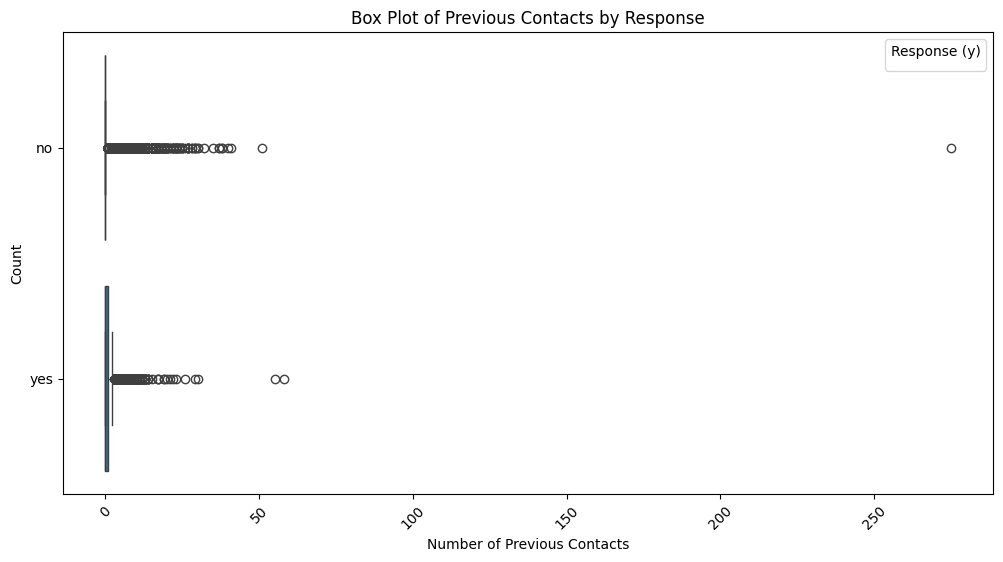

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(x='previous', y='y',data=df)
plt.title('Box Plot of Previous Contacts by Response')
plt.xlabel('Number of Previous Contacts')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Response (y)')
plt.show()

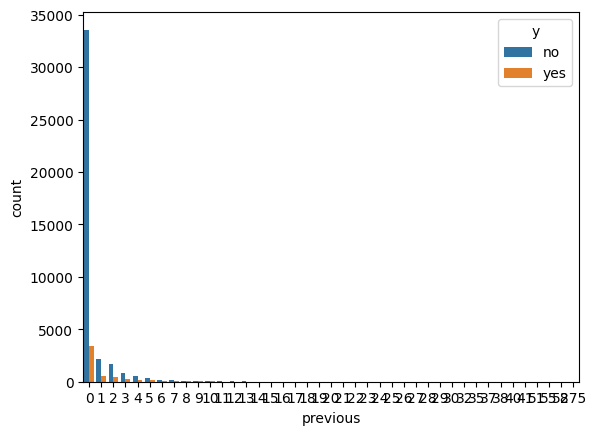

In [ ]:
sns.countplot(x=df['previous'], hue=df['y'])
plt.show()

# 33) Previous Outcome VS Subscription

In [ ]:
pout = pd.crosstab(df['y'],df['poutcome'])
pout

poutcome  failure  other  success  unknown
y                                         
no           4283   1533      533    33573
yes           618    307      978     3386

<Figure size 1000x600 with 0 Axes>

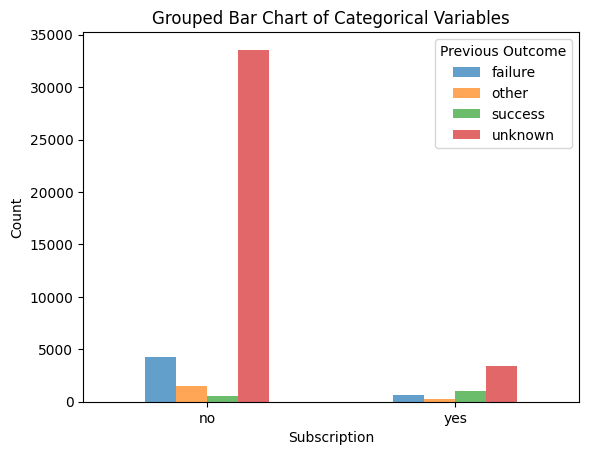

In [ ]:
plt.figure(figsize=(10, 6))
pout.plot(kind='bar', alpha=0.7)
plt.title('Grouped Bar Chart of Categorical Variables')
plt.xlabel('Subscription')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.legend(title='Previous Outcome')
plt.show()

### even those who had a successful outcome in the past are not likely to subscribe.

# 34) Pair-Plot

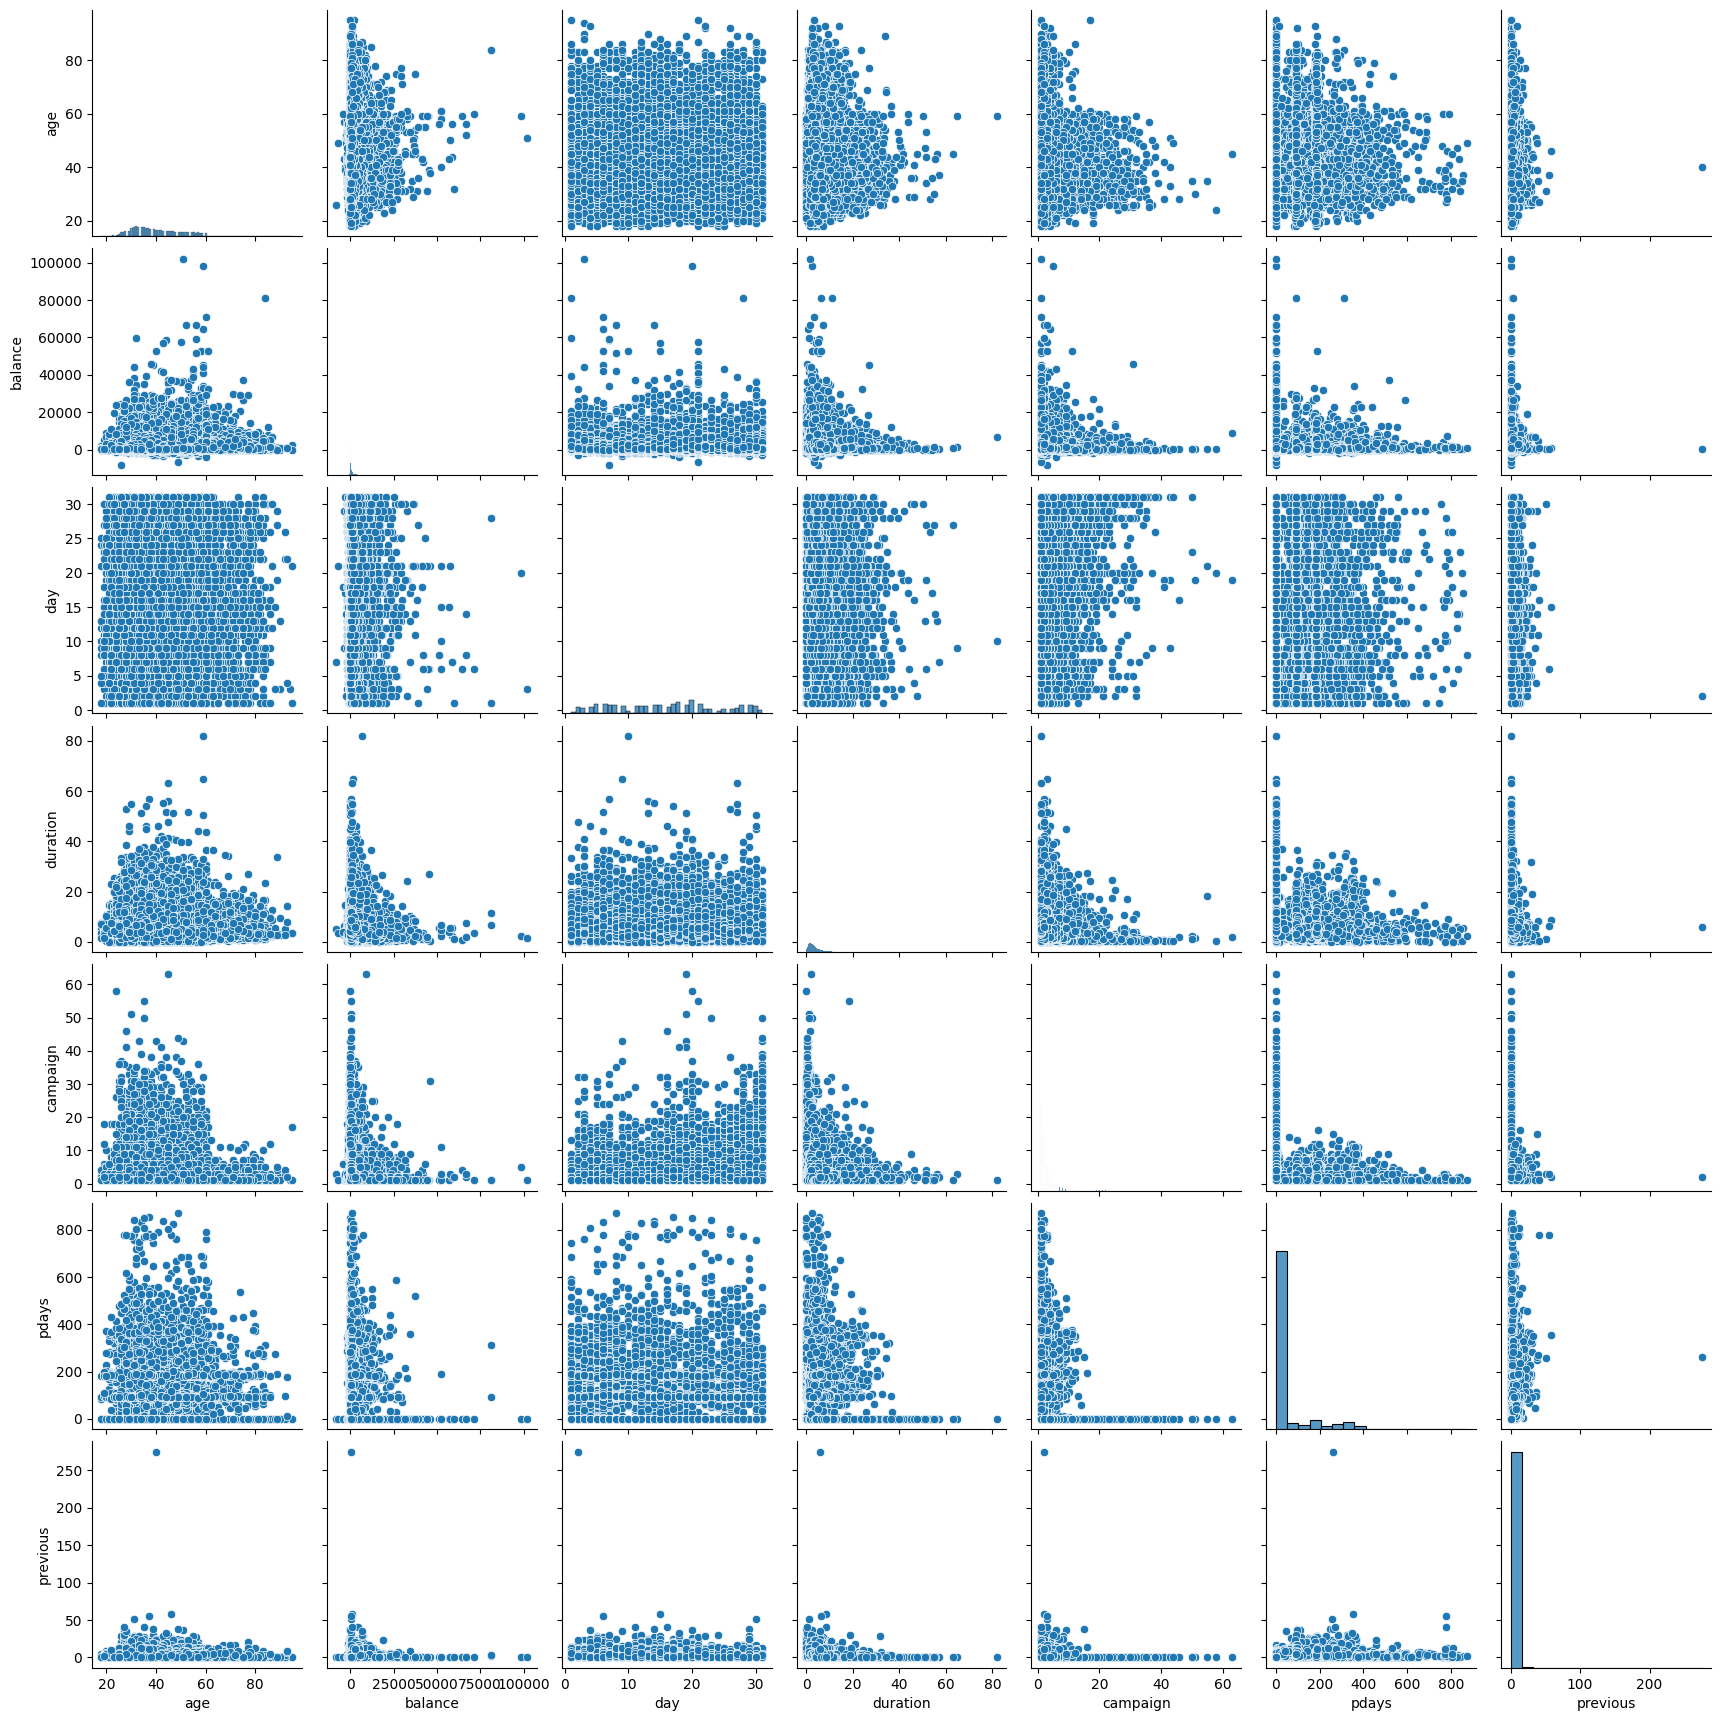

In [ ]:
sns.pairplot(df)
plt.show()

This pair plot reveals key patterns in your data:

  Distribution Patterns: Variables like balance and pdays are highly skewed, with most values concentrated at lower ranges.
  No Strong Correlations: Most scatterplots show no clear linear relationships, suggesting individual variables alone may not be strongly predictive.
  Outliers: Variables such as balance and previous contain outliers, potentially representing high-value or long-term customers.
  Clustered Values: Many variables, especially campaign and day, have values clustered at the lower end, indicating frequent early campaign interactions.

# Feature Engineering

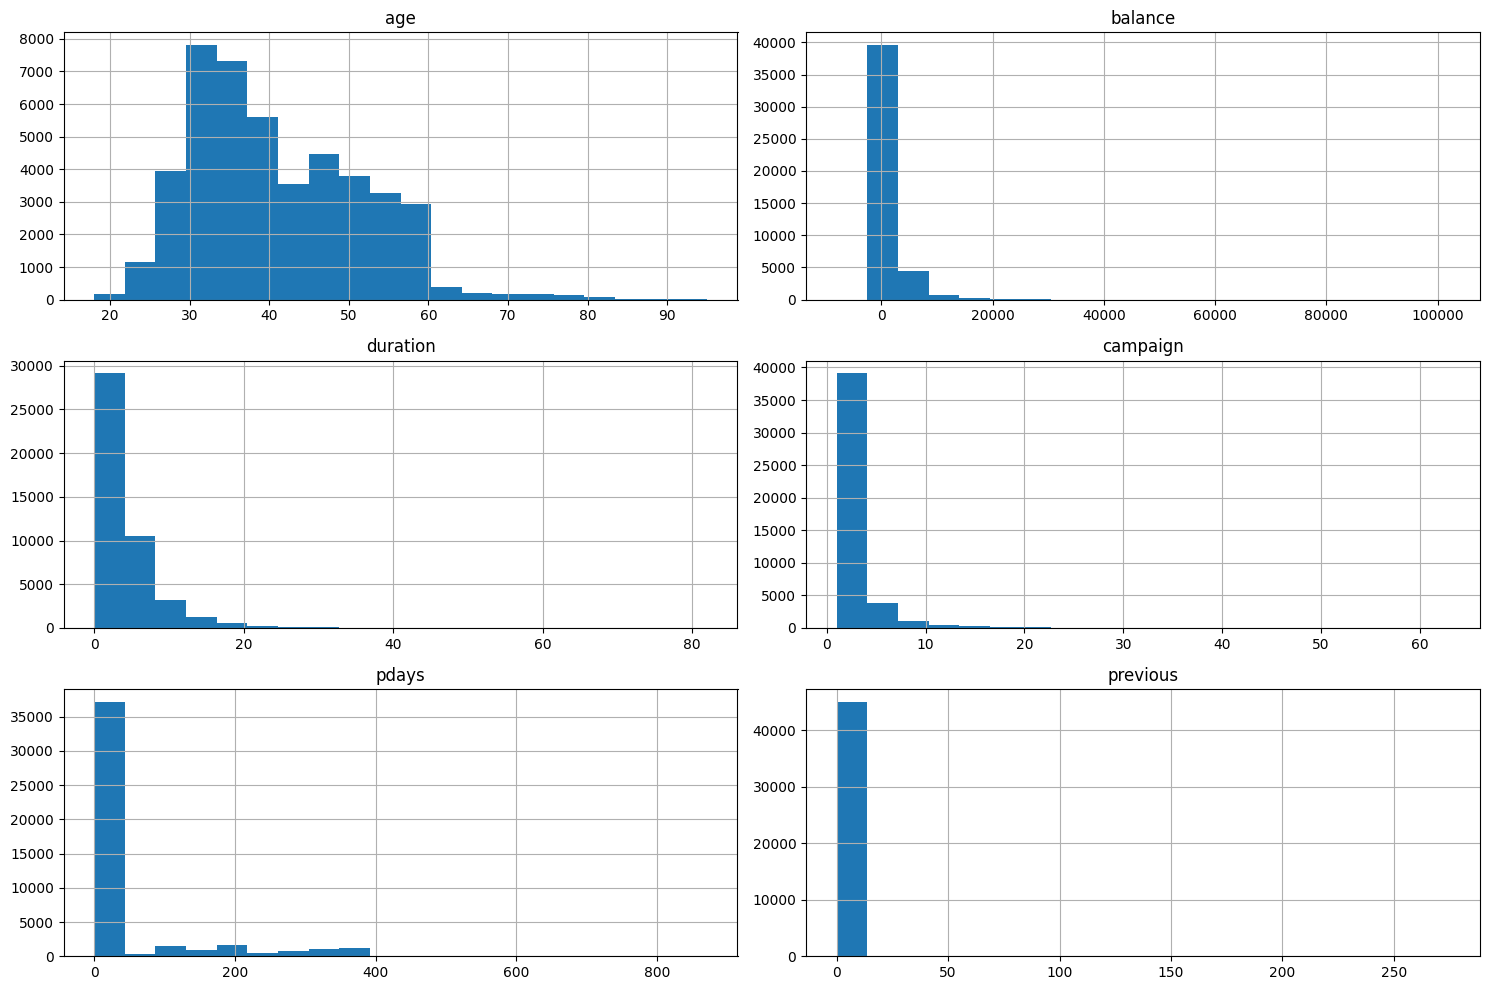

In [ ]:
# Plotting the distribution of numerical features
numerical_cols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
df[numerical_cols].hist(bins=20, figsize=(15, 10))
plt.tight_layout()
plt.show()


# Binning age into categories


In [ ]:
bins = [0, 25, 40, 60, 100]
labels = ['Young', 'Middle-aged', 'Senior', 'Elderly']
df['age_bin'] = pd.cut(df['age'], bins=bins, labels=labels)
df['age_bin']

0             Senior
1             Senior
2        Middle-aged
3             Senior
4        Middle-aged
            ...     
45206         Senior
45207        Elderly
45208        Elderly
45209         Senior
45210    Middle-aged
Name: age_bin, Length: 45211, dtype: category
Categories (4, object): ['Young' < 'Middle-aged' < 'Senior' < 'Elderly']

In [ ]:
df['age_bin'].value_counts()

age_bin
Middle-aged    23381
Senior         19306
Young           1336
Elderly         1188
Name: count, dtype: int64

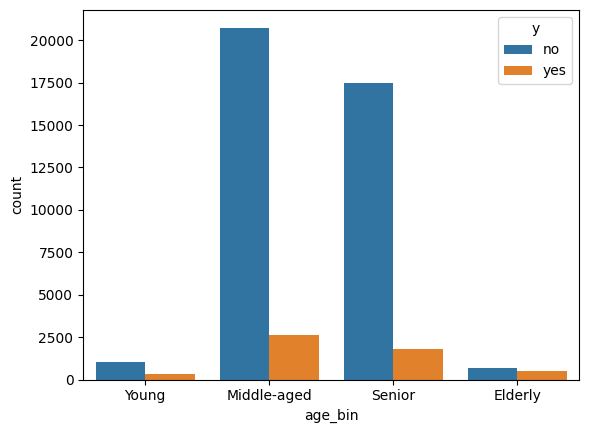

In [ ]:
sns.countplot(x=df['age_bin'], hue=df['y'])
plt.show()

In [ ]:
pd.crosstab(df['y'],df['age_bin'])

age_bin  Young  Middle-aged  Senior  Elderly
y                                           
no        1016        20744   17476      686
yes        320         2637    1830      502

# Create an interaction feature between balance and housing loan

In [ ]:
df['balance_housing'] = df['balance'] * df['housing'].apply(lambda x: 1 if x == 'yes' else 0)
df['balance_housing']

0        2143
1          29
2           2
3        1506
4           0
         ... 
45206       0
45207       0
45208       0
45209       0
45210       0
Name: balance_housing, Length: 45211, dtype: int64

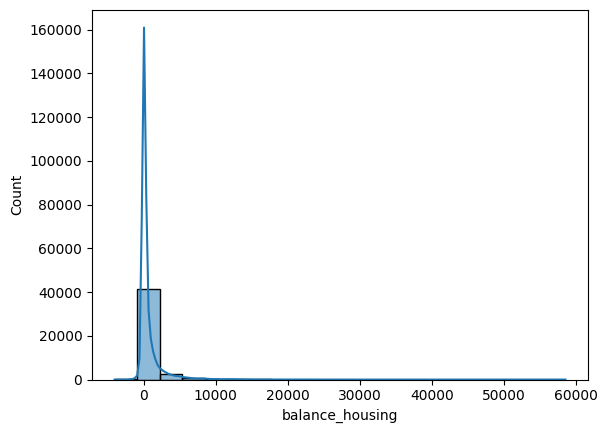

In [ ]:
sns.histplot(df['balance_housing'], kde=True, bins=20)
plt.show()

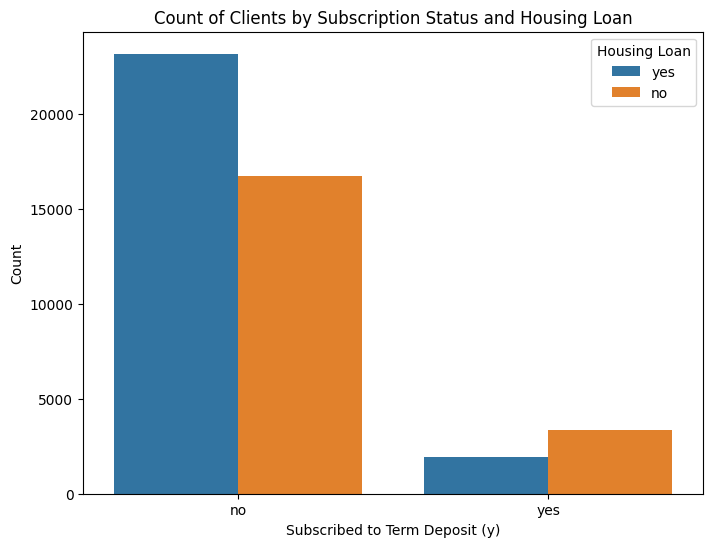

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(x='y', hue='housing', data=df)
plt.title('Count of Clients by Subscription Status and Housing Loan')
plt.xlabel('Subscribed to Term Deposit (y)')
plt.ylabel('Count')
plt.legend(title='Housing Loan')
plt.xticks(rotation=0)
plt.show()


# Create a feature indicating if the last contact day is a weekend

In [ ]:
df['is_weekend'] = df['day'].apply(lambda x: 1 if x in [6, 7] else 0)
df['is_weekend'].value_counts()

is_weekend
0    41462
1     3749
Name: count, dtype: int64

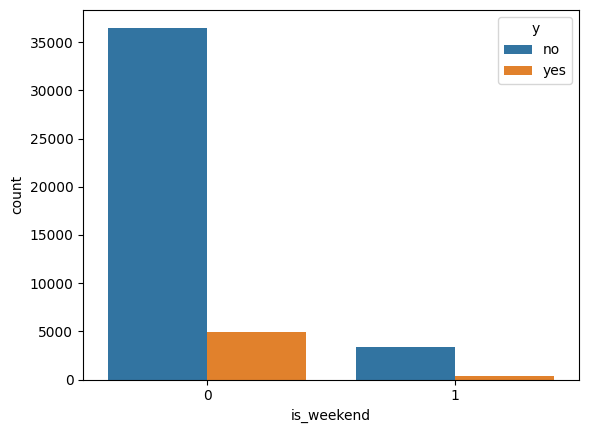

In [ ]:
sns.countplot(x=df['is_weekend'], hue=df['y'])
plt.show()

In [ ]:
#Change column name: 'y' to 'response'
df.rename(index=str, columns={'y': 'response'}, inplace = True)

In [ ]:
edu_job_y = df[df['education']=='unknown']
edu_job_y.groupby(['education','job']).size().unstack() # No Relation

job        admin.  blue-collar  entrepreneur  housemaid  management  retired  \
education                                                                      
unknown       171          454            76         45         242      119   

job        self-employed  services  student  technician  unemployed  unknown  
education                                                                     
unknown               39       150      163         242          29      127

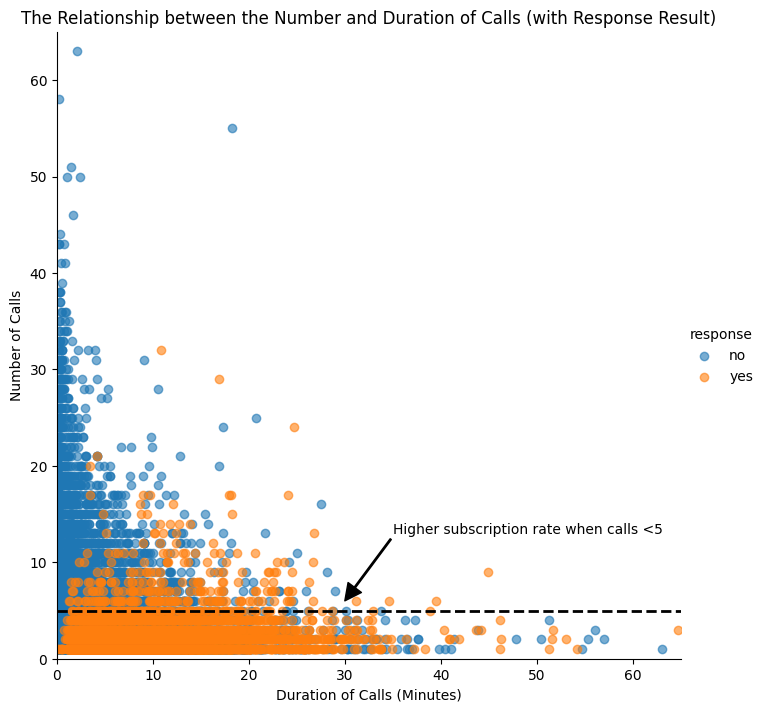

In [ ]:
# Visualize the relationship between 'duration' & 'campaign': with response result
dur_cam = sns.lmplot(x='duration', y='campaign',data = df,
                     hue = 'response',
                     fit_reg = False,
                     scatter_kws={'alpha':0.6}, height =7)

plt.axis([0,65,0,65])
plt.ylabel('Number of Calls')
plt.xlabel('Duration of Calls (Minutes)')
plt.title('The Relationship between the Number and Duration of Calls (with Response Result)')

# Annotation
plt.axhline(y=5, linewidth=2, color="k", linestyle='--')
plt.annotate('Higher subscription rate when calls <5',xytext = (35,13),
             arrowprops=dict(color = 'k', width=1),xy=(30,6))
plt.show()

### The Plot Shows that the bank should resist calling a client for more than five times, which can be disturbing and increase dissatisfaction. for "YES" clients call duration is longer but number of calls are less

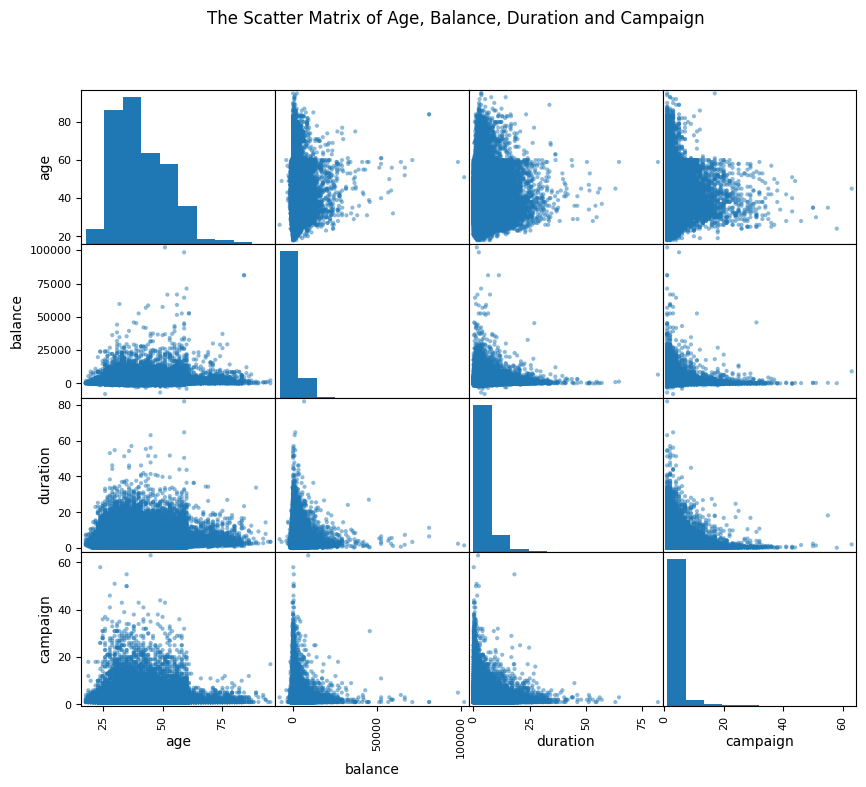

In [ ]:
from pandas.plotting import scatter_matrix
matrix = scatter_matrix(df[['age','balance','duration','campaign']],figsize=(10,8))

plt.suptitle('The Scatter Matrix of Age, Balance, Duration and Campaign')
plt.show()

# Correlation

In [ ]:
dff = df.copy()
dff['response_binary'] = dff['response'].map({'yes': 1, 'no': 0})

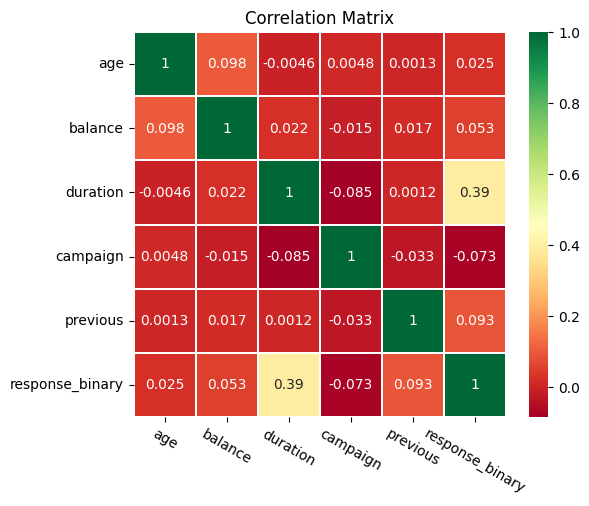

In [ ]:
corr_data = dff[['age','balance','duration','campaign','previous','response_binary']]
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(6,5)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

###  Has a strong correlation with “duration”, a moderate correlation with “previous contacts”, and mild correlations between “balance”.

# subscription vs contact rate by age

In [ ]:
pd.crosstab(df['response'],df['age_bin']).apply(lambda x: x/x.sum() * 100)

age_bin       Young  Middle-aged     Senior    Elderly
response                                              
no        76.047904    88.721612  90.521082  57.744108
yes       23.952096    11.278388   9.478918  42.255892

In [ ]:
# Filter the data for clients who were previously contacted
df_contacted = df[df['previous'] > 0]  # Assuming 'previous' > 0 means previously contacted

# Create a crosstab to see the percentage of subscriptions (yes/no) by age_bin
contacted_age_response = pd.crosstab(df_contacted['response'], df_contacted['age_bin'], normalize='columns') * 100
contacted_age_response

age_bin       Young  Middle-aged     Senior  Elderly
response                                            
no        58.943089    79.228552  78.818538     50.0
yes       41.056911    20.771448  21.181462     50.0

In [ ]:
# Calculate contact rate by age group
total_clients_by_age = df['age_bin'].value_counts()
contacted_clients_by_age = df[df['previous'] > 0]['age_bin'].value_counts()
contact_rate_by_age = (contacted_clients_by_age / total_clients_by_age * 100).sort_index()

# Calculate subscription rate for contacted clients by age group
subscribed_clients_by_age = df[(df['previous'] > 0) & (df['response'] == 'yes')]['age_bin'].value_counts()
subscription_rate_by_age = (subscribed_clients_by_age / contacted_clients_by_age * 100).sort_index()
subscription_rate_by_age

age_bin
Young          41.056911
Middle-aged    20.771448
Senior         21.181462
Elderly        50.000000
Name: count, dtype: float64

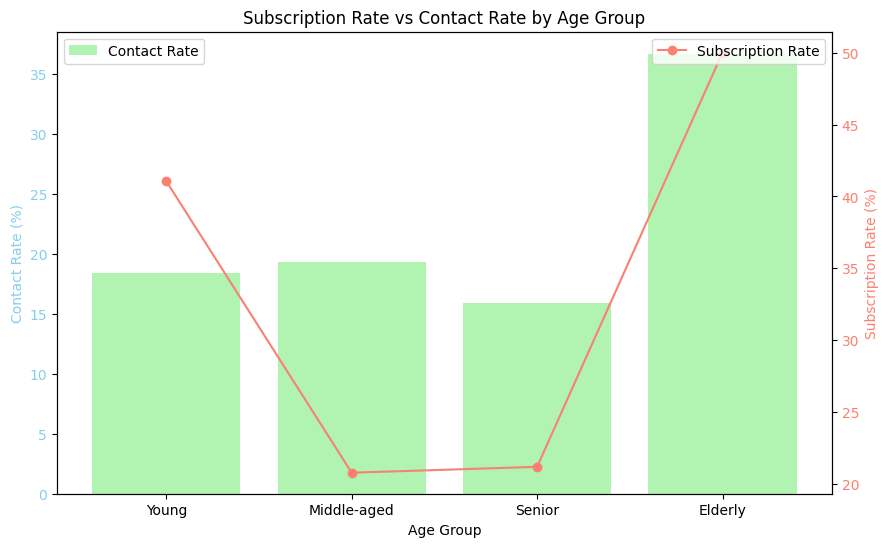

In [ ]:
fig, ax1 = plt.subplots(figsize=(10, 6))

# Bar plot for contact rate
ax1.bar(contact_rate_by_age.index, contact_rate_by_age, color='lightgreen', label='Contact Rate', alpha=0.7)
ax1.set_xlabel('Age Group')
ax1.set_ylabel('Contact Rate (%)', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')

ax2 = ax1.twinx()
ax2.plot(subscription_rate_by_age.index, subscription_rate_by_age, color='salmon', marker='o', label='Subscription Rate')
ax2.set_ylabel('Subscription Rate (%)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')
plt.title('Subscription Rate vs Contact Rate by Age Group')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

plt.show()

In [ ]:
### Most of the subscriptions are taken by young and elderly people.

# Example categories based on balance

In [ ]:
# Step 1: Define balance categories without modifying the original DataFrame
balance_categories = pd.cut(df['balance'], bins=[-1, 0, 1000, 5000, df['balance'].max()],
                            labels=['no balance', 'low balance', 'average balance', 'high balance'])

# Step 2: Calculate total clients, contacted clients, and subscribed clients by balance category
total_clients_by_balance = balance_categories.value_counts()
contacted_clients_by_balance = balance_categories[df['previous'] > 0].value_counts()
subscribed_clients_by_balance = balance_categories[(df['previous'] > 0) & (df['response'] == 'yes')].value_counts()

# Step 3: Calculate contact rate and subscription rate by balance level
contact_rate_by_balance = (contacted_clients_by_balance / total_clients_by_balance * 100).sort_index()
subscription_rate_by_balance = (subscribed_clients_by_balance / contacted_clients_by_balance * 100).sort_index()


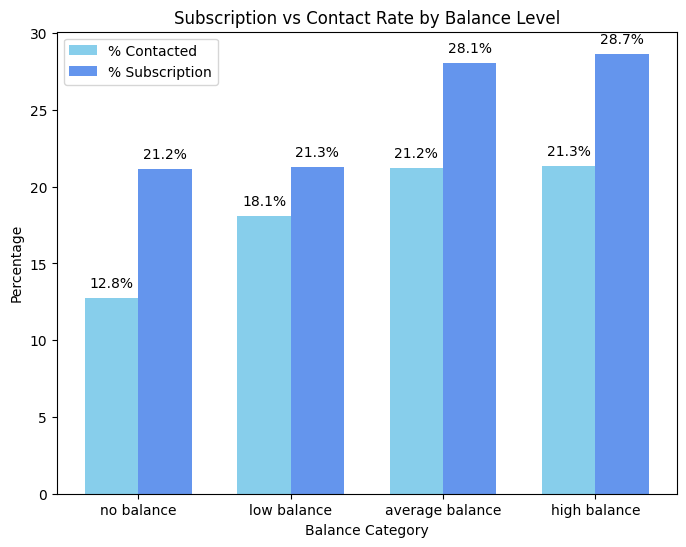

In [ ]:
balance_categories = contact_rate_by_balance.index
contact_rate_values = contact_rate_by_balance.values
subscription_rate_values = subscription_rate_by_balance.values

bar_width = 0.35
index = np.arange(len(balance_categories))

fig, ax = plt.subplots(figsize=(8, 6))

bars1 = ax.bar(index, contact_rate_values, bar_width, label='% Contacted', color='skyblue')

bars2 = ax.bar(index + bar_width, subscription_rate_values, bar_width, label='% Subscription', color='cornflowerblue')

ax.set_xlabel('Balance Category')
ax.set_ylabel('Percentage')
ax.set_title('Subscription vs Contact Rate by Balance Level')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(balance_categories)
ax.legend()

for bars in [bars1, bars2]:
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval + 0.5, f'{yval:.1f}%', ha='center', va='bottom')

plt.show()


# Pre-Processing

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 45211 entries, 0 to 45210
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   age              45211 non-null  int64   
 1   job              45211 non-null  object  
 2   marital          45211 non-null  object  
 3   education        45211 non-null  object  
 4   default          45211 non-null  object  
 5   balance          45211 non-null  int64   
 6   housing          45211 non-null  object  
 7   loan             45211 non-null  object  
 8   contact          45211 non-null  object  
 9   day              45211 non-null  int64   
 10  month            45211 non-null  object  
 11  duration         45211 non-null  float64 
 12  campaign         45211 non-null  int64   
 13  pdays            45211 non-null  int64   
 14  previous         45211 non-null  int64   
 15  poutcome         45211 non-null  object  
 16  response         45211 non-null  object  
 17

In [ ]:
df.head(3)

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   

   contact  day  ... pdays  previous  poutcome  response   pdays_binned  \
0  unknown    5  ...     0         0   unknown        no  Not Contacted   
1  unknown    5  ...     0         0   unknown        no  Not Contacted   
2  unknown    5  ...     0         0   unknown        no  Not Contacted   

  weekday duration_binned      age_bin balance_housing is_weekend  
0  Sunday   Not Contacted       Senior            2143          0  
1  Sunday   Not Contacted       Senior              29          0  
2  Sunday   Not Contacted  Middle-aged               2          0  

[3 rows x 23 columns]

In [ ]:
# Binary encoding
df['default'] = df['default'].map({'yes': 1, 'no': 0})
df['housing'] = df['housing'].map({'yes': 1, 'no': 0})
df['loan'] = df['loan'].map({'yes': 1, 'no': 0})
df['response'] = df['response'].map({'yes': 1, 'no': 0})

In [ ]:
df.drop(columns=['month','pdays','weekday','duration_binned'],inplace=True)

In [ ]:
df.head(3)

age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   

   contact  day  duration  campaign  previous poutcome  response  \
0  unknown    5      4.35         1         0  unknown         0   
1  unknown    5      2.52         1         0  unknown         0   
2  unknown    5      1.27         1         0  unknown         0   

    pdays_binned      age_bin  balance_housing  is_weekend  
0  Not Contacted       Senior             2143           0  
1  Not Contacted       Senior               29           0  
2  Not Contacted  Middle-aged                2           0

In [ ]:
df['week_of_month'] = pd.cut(df['day'], bins=[0, 7, 14, 21, 28, 31], labels=['Week1', 'Week2', 'Week3', 'Week4', 'End'])
df['week_of_month'].value_counts()

week_of_month
Week3    13900
Week2    10442
Week1     9798
Week4     7117
End       3954
Name: count, dtype: int64

In [ ]:
df.head()

age           job  marital  education  default  balance  housing  loan  \
0   58    management  married   tertiary        0     2143        1     0   
1   44    technician   single  secondary        0       29        1     0   
2   33  entrepreneur  married  secondary        0        2        1     1   
3   47   blue-collar  married    unknown        0     1506        1     0   
4   33       unknown   single    unknown        0        1        0     0   

   contact  day  duration  campaign  previous poutcome  response  \
0  unknown    5      4.35         1         0  unknown         0   
1  unknown    5      2.52         1         0  unknown         0   
2  unknown    5      1.27         1         0  unknown         0   
3  unknown    5      1.53         1         0  unknown         0   
4  unknown    5      3.30         1         0  unknown         0   

    pdays_binned      age_bin  balance_housing  is_weekend week_of_month  
0  Not Contacted       Senior             2143           0         Week1  
1  Not Contacted       Senior               29           0         Week1  
2  Not Contacted  Middle-aged                2           0         Week1  
3  Not Contacted       Senior             1506           0         Week1  
4  Not Contacted  Middle-aged                0           0         Week1

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [ ]:
X = df.drop(columns=['response'])
y = df['response']
# Split the Data into Train and Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
num_cols_train = X_train.select_dtypes(include=['int', 'float'])
num_cols_train = scaler.fit_transform(num_cols_train)
num_cols_train = pd.DataFrame(num_cols_train, columns=X_train.select_dtypes(include=['int', 'float']).columns)
num_cols_train

age   default   balance   housing      loan       day  duration  \
0      0.006515 -0.138113 -0.169381  0.892343 -0.438594 -0.098218 -0.719759   
1      0.759937 -0.138113  0.017848  0.892343 -0.438594  1.703422  0.046354   
2      0.100693 -0.138113  0.820681 -1.120646 -0.438594  1.823532 -0.493195   
3     -0.370196 -0.138113 -0.489588  0.892343 -0.438594 -0.578656  0.459775   
4      1.419181 -0.138113  0.706889 -1.120646 -0.438594 -0.098218  0.027668   
...         ...       ...       ...       ...       ...       ...       ...   
36163  0.289048 -0.138113 -0.099915 -1.120646 -0.438594  0.262110  7.146913   
36164 -1.688684 -0.138113 -0.282181 -1.120646 -0.438594 -0.938984 -0.182546   
36165 -0.652729 -0.138113 -0.014570  0.892343 -0.438594 -0.098218 -0.070431   
36166 -0.746907 -0.138113 -0.395643 -1.120646 -0.438594 -1.059093 -0.567938   
36167 -0.276018 -0.138113 -0.463787  0.892343 -0.438594  0.622438 -0.736109   

       campaign  previous  balance_housing  is_weekend  
0     -0.565886 -0.244772         0.099124   -0.301511  
1     -0.245389 -0.244772         0.390562   -0.301511  
2      0.395606 -0.244772        -0.338032   -0.301511  
3      2.639088 -0.244772        -0.399306   -0.301511  
4     -0.245389 -0.244772        -0.338032   -0.301511  
...         ...       ...              ...         ...  
36163 -0.565886 -0.244772        -0.338032   -0.301511  
36164 -0.565886  0.177056        -0.338032   -0.301511  
36165 -0.565886 -0.244772         0.340101   -0.301511  
36166 -0.565886 -0.244772        -0.338032    3.316625  
36167  2.318591 -0.244772        -0.359143   -0.301511  

[36168 rows x 11 columns]

In [ ]:
num_cols_test = X_test.select_dtypes(include=['int', 'float'])
num_cols_test = scaler.fit_transform(num_cols_test)
num_cols_test = pd.DataFrame(num_cols_test, columns=X_test.select_dtypes(include=['int', 'float']).columns)
num_cols_test

age   default   balance   housing      loan       day  duration  \
0    -0.090182 -0.124487 -0.251495  0.900228 -0.429615  0.028748 -0.274007   
1     0.568933 -0.124487  0.727425 -1.110830 -0.429615 -0.813735 -0.693971   
2    -1.502571 -0.124487 -0.264914  0.900228 -0.429615  0.510167 -0.142480   
3     0.098137 -0.124487  0.129657 -1.110830 -0.429615 -0.813735  0.182877   
4     1.416366 -0.124487 -0.367471 -1.110830  2.327666  0.630521 -0.546291   
...        ...       ...       ...       ...       ...       ...       ...   
9038  0.568933 -0.124487  0.167038 -1.110830 -0.429615 -0.934090 -0.393997   
9039 -0.843456 -0.124487 -0.367471  0.900228 -0.429615 -0.091607  1.648135   
9040  1.039729 -0.124487 -0.436800  0.900228 -0.429615  1.232295 -0.220935   
9041 -0.090182 -0.124487 -0.186639  0.900228  2.327666  0.028748 -0.354769   
9042 -0.372659 -0.124487  0.268955 -1.110830 -0.429615  0.510167 -0.370922   

      campaign  previous  balance_housing  is_weekend  
0    -0.584037 -0.288514        -0.030897   -0.297437  
1    -0.251557 -0.288514        -0.330203   -0.297437  
2    -0.584037 -0.288514        -0.052571   -0.297437  
3    -0.584037  0.208445        -0.330203   -0.297437  
4    -0.251557 -0.288514        -0.330203   -0.297437  
...        ...       ...              ...         ...  
9038 -0.584037 -0.288514        -0.330203   -0.297437  
9039  0.080923 -0.288514        -0.218221   -0.297437  
9040 -0.584037 -0.288514        -0.330203   -0.297437  
9041 -0.251557 -0.288514         0.073860   -0.297437  
9042 -0.251557 -0.288514        -0.330203   -0.297437  

[9043 rows x 11 columns]

In [ ]:
cat_cols_train = X_train.select_dtypes(include=['object', 'category']).columns
cat_cols_train = pd.get_dummies(X_train[cat_cols_train], columns=cat_cols_train, drop_first=True)
cat_cols_train

job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
3344              True             False          False           False   
17965            False             False          False           False   
18299            False             False          False           False   
10221            False             False          False            True   
32192             True             False          False           False   
...                ...               ...            ...             ...   
11284            False             False           True           False   
44732            False             False          False           False   
38158            False             False          False           False   
860              False             False          False           False   
15795             True             False          False           False   

       job_retired  job_self-employed  job_services  job_student  \
3344         False              False         False        False   
17965        False              False         False        False   
18299        False              False         False        False   
10221        False              False         False        False   
32192        False              False         False        False   
...            ...                ...           ...          ...   
11284        False              False         False        False   
44732        False              False         False         True   
38158        False              False         False        False   
860           True              False         False        False   
15795        False              False         False        False   

       job_technician  job_unemployed  ...  pdays_binned_21-30 Days  \
3344            False           False  ...                    False   
17965            True           False  ...                    False   
18299           False           False  ...                    False   
10221           False           False  ...                    False   
32192           False           False  ...                    False   
...               ...             ...  ...                      ...   
11284           False           False  ...                    False   
44732           False           False  ...                    False   
38158            True           False  ...                    False   
860             False           False  ...                    False   
15795           False           False  ...                    False   

       pdays_binned_31-40 Days  pdays_binned_Not Contacted  \
3344                     False                        True   
17965                    False                        True   
18299                    False                        True   
10221                    False                        True   
32192                    False                        True   
...                        ...                         ...   
11284                    False                        True   
44732                    False                        True   
38158                    False                        True   
860                      False                        True   
15795                    False                        True   

       age_bin_Middle-aged  age_bin_Senior  age_bin_Elderly  \
3344                 False            True            False   
17965                False            True            False   
18299                False            True            False   
10221                 True           False            False   
32192                False            True            False   
...                    ...             ...              ...   
11284                False            True            False   
44732                False           False            False   
38158                 True           False            False   
860                   True           False            False  

In [ ]:
cat_cols_test = X_test.select_dtypes(include=['object', 'category']).columns
cat_cols_test = pd.get_dummies(X_test[cat_cols_test], columns=cat_cols_test, drop_first=True)
cat_cols_test

job_blue-collar  job_entrepreneur  job_housemaid  job_management  \
3776              True             False          False           False   
9928             False             False          False           False   
33409            False             False          False           False   
31885            False             False          False            True   
15738            False             False          False            True   
...                ...               ...            ...             ...   
13353            False             False          False            True   
38732             True             False          False           False   
5654             False             False          False           False   
3779             False             False          False           False   
11677            False             False          False           False   

       job_retired  job_self-employed  job_services  job_student  \
3776         False              False         False        False   
9928         False              False          True        False   
33409        False              False         False         True   
31885        False              False         False        False   
15738        False              False         False        False   
...            ...                ...           ...          ...   
13353        False              False         False        False   
38732        False              False         False        False   
5654         False              False         False        False   
3779         False              False         False        False   
11677        False              False         False        False   

       job_technician  job_unemployed  ...  pdays_binned_21-30 Days  \
3776            False           False  ...                    False   
9928            False           False  ...                    False   
33409           False           False  ...                    False   
31885           False           False  ...                    False   
15738           False           False  ...                    False   
...               ...             ...  ...                      ...   
13353           False           False  ...                    False   
38732           False           False  ...                    False   
5654            False           False  ...                    False   
3779            False           False  ...                    False   
11677            True           False  ...                    False   

       pdays_binned_31-40 Days  pdays_binned_Not Contacted  \
3776                     False                        True   
9928                     False                        True   
33409                    False                        True   
31885                    False                        True   
15738                    False                        True   
...                        ...                         ...   
13353                    False                        True   
38732                    False                        True   
5654                     False                        True   
3779                     False                        True   
11677                    False                        True   

       age_bin_Middle-aged  age_bin_Senior  age_bin_Elderly  \
3776                  True           False            False   
9928                 False            True            False   
33409                False           False            False   
31885                False            True            False   
15738                False            True            False   
...                    ...             ...              ...   
13353                False            True            False   
38732                 True           False            False   
5654                 False            True            False   
3779                  True           False            False  

In [ ]:
num_cols_train.reset_index(drop=True, inplace=True)
cat_cols_train.reset_index(drop=True, inplace=True)

In [ ]:
num_cols_test.reset_index(drop=True, inplace=True)
cat_cols_test.reset_index(drop=True, inplace=True)

In [ ]:
merged_df_train = pd.concat([num_cols_train, cat_cols_train], axis=1)
merged_df_train

age   default   balance   housing      loan       day  duration  \
0      0.006515 -0.138113 -0.169381  0.892343 -0.438594 -0.098218 -0.719759   
1      0.759937 -0.138113  0.017848  0.892343 -0.438594  1.703422  0.046354   
2      0.100693 -0.138113  0.820681 -1.120646 -0.438594  1.823532 -0.493195   
3     -0.370196 -0.138113 -0.489588  0.892343 -0.438594 -0.578656  0.459775   
4      1.419181 -0.138113  0.706889 -1.120646 -0.438594 -0.098218  0.027668   
...         ...       ...       ...       ...       ...       ...       ...   
36163  0.289048 -0.138113 -0.099915 -1.120646 -0.438594  0.262110  7.146913   
36164 -1.688684 -0.138113 -0.282181 -1.120646 -0.438594 -0.938984 -0.182546   
36165 -0.652729 -0.138113 -0.014570  0.892343 -0.438594 -0.098218 -0.070431   
36166 -0.746907 -0.138113 -0.395643 -1.120646 -0.438594 -1.059093 -0.567938   
36167 -0.276018 -0.138113 -0.463787  0.892343 -0.438594  0.622438 -0.736109   

       campaign  previous  balance_housing  ...  pdays_binned_21-30 Days  \
0     -0.565886 -0.244772         0.099124  ...                    False   
1     -0.245389 -0.244772         0.390562  ...                    False   
2      0.395606 -0.244772        -0.338032  ...                    False   
3      2.639088 -0.244772        -0.399306  ...                    False   
4     -0.245389 -0.244772        -0.338032  ...                    False   
...         ...       ...              ...  ...                      ...   
36163 -0.565886 -0.244772        -0.338032  ...                    False   
36164 -0.565886  0.177056        -0.338032  ...                    False   
36165 -0.565886 -0.244772         0.340101  ...                    False   
36166 -0.565886 -0.244772        -0.338032  ...                    False   
36167  2.318591 -0.244772        -0.359143  ...                    False   

       pdays_binned_31-40 Days  pdays_binned_Not Contacted  \
0                        False                        True   
1                        False                        True   
2                        False                        True   
3                        False                        True   
4                        False                        True   
...                        ...                         ...   
36163                    False                        True   
36164                    False                        True   
36165                    False                        True   
36166                    False                        True   
36167                    False                        True   

       age_bin_Middle-aged  age_bin_Senior  age_bin_Elderly  \
0                    False            True            False   
1                    False            True            False   
2                    False            True            False   
3                     True           False            False   
4                    False            True            False   
...                    ...             ...              ...   
36163                False            True            False   
36164                False           False            False   
36165                 True           False            False   
36166                 True           False            False   
36167                 True           False            False   

       week_of_month_Week2  week_of_month_Week3  week_of_month_Week4  \
0                    False                 True                False   
1                    False                False                False   
2                    False                False                False   
3                     True                False                False   
4                    False                 True                False   
...                    ...                  ...                  ...   
36163                False                 True                False   
36164                 True                False                False   


In [ ]:
merged_df_test = pd.concat([num_cols_test, cat_cols_test], axis=1)
merged_df_test

age   default   balance   housing      loan       day  duration  \
0    -0.090182 -0.124487 -0.251495  0.900228 -0.429615  0.028748 -0.274007   
1     0.568933 -0.124487  0.727425 -1.110830 -0.429615 -0.813735 -0.693971   
2    -1.502571 -0.124487 -0.264914  0.900228 -0.429615  0.510167 -0.142480   
3     0.098137 -0.124487  0.129657 -1.110830 -0.429615 -0.813735  0.182877   
4     1.416366 -0.124487 -0.367471 -1.110830  2.327666  0.630521 -0.546291   
...        ...       ...       ...       ...       ...       ...       ...   
9038  0.568933 -0.124487  0.167038 -1.110830 -0.429615 -0.934090 -0.393997   
9039 -0.843456 -0.124487 -0.367471  0.900228 -0.429615 -0.091607  1.648135   
9040  1.039729 -0.124487 -0.436800  0.900228 -0.429615  1.232295 -0.220935   
9041 -0.090182 -0.124487 -0.186639  0.900228  2.327666  0.028748 -0.354769   
9042 -0.372659 -0.124487  0.268955 -1.110830 -0.429615  0.510167 -0.370922   

      campaign  previous  balance_housing  ...  pdays_binned_21-30 Days  \
0    -0.584037 -0.288514        -0.030897  ...                    False   
1    -0.251557 -0.288514        -0.330203  ...                    False   
2    -0.584037 -0.288514        -0.052571  ...                    False   
3    -0.584037  0.208445        -0.330203  ...                    False   
4    -0.251557 -0.288514        -0.330203  ...                    False   
...        ...       ...              ...  ...                      ...   
9038 -0.584037 -0.288514        -0.330203  ...                    False   
9039  0.080923 -0.288514        -0.218221  ...                    False   
9040 -0.584037 -0.288514        -0.330203  ...                    False   
9041 -0.251557 -0.288514         0.073860  ...                    False   
9042 -0.251557 -0.288514        -0.330203  ...                    False   

      pdays_binned_31-40 Days  pdays_binned_Not Contacted  \
0                       False                        True   
1                       False                        True   
2                       False                        True   
3                       False                        True   
4                       False                        True   
...                       ...                         ...   
9038                    False                        True   
9039                    False                        True   
9040                    False                        True   
9041                    False                        True   
9042                    False                        True   

      age_bin_Middle-aged  age_bin_Senior  age_bin_Elderly  \
0                    True           False            False   
1                   False            True            False   
2                   False           False            False   
3                   False            True            False   
4                   False            True            False   
...                   ...             ...              ...   
9038                False            True            False   
9039                 True           False            False   
9040                False            True            False   
9041                 True           False            False   
9042                 True           False            False   

      week_of_month_Week2  week_of_month_Week3  week_of_month_Week4  \
0                   False                 True                False   
1                    True                False                False   
2                   False                 True                False   
3                    True                False                False   
4                   False                 True                False   
...                   ...                  ...                  ...   
9038                 True                False                False   
9039                False                 True                False   
9040                False                False          

In [ ]:
print(merged_df_train.isnull().sum())

age                           0
default                       0
balance                       0
housing                       0
loan                          0
day                           0
duration                      0
campaign                      0
previous                      0
balance_housing               0
is_weekend                    0
job_blue-collar               0
job_entrepreneur              0
job_housemaid                 0
job_management                0
job_retired                   0
job_self-employed             0
job_services                  0
job_student                   0
job_technician                0
job_unemployed                0
job_unknown                   0
marital_married               0
marital_single                0
education_secondary           0
education_tertiary            0
education_unknown             0
contact_telephone             0
contact_unknown               0
poutcome_other                0
poutcome_success              0
poutcome

# Model Building

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.linear_model  import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
model = RandomForestClassifier(random_state=42)

model.fit(merged_df_train, y_train)


RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(merged_df_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')

print(classification_report(y_test, y_pred))

Accuracy: 0.90
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.66      0.32      0.43      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.69      9043
weighted avg       0.88      0.90      0.88      9043



In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(merged_df_train, y_train)
print(f'Best parameters: {grid_search.best_params_}')


Best parameters: {'max_depth': 20, 'n_estimators': 200}


In [ ]:
best_model = RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)
best_model.fit(merged_df_train, y_train)


RandomForestClassifier(max_depth=20, n_estimators=200, random_state=42)

In [ ]:
y_pred = best_model.predict(merged_df_test)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.90
Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.65      0.31      0.42      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.64      0.68      9043
weighted avg       0.88      0.90      0.88      9043

Confusion Matrix:
 [[7774  178]
 [ 757  334]]


In [ ]:
cv_scores = cross_val_score(best_model, merged_df_train, y_train, cv=5)
print(f'Cross-validation scores: {cv_scores}')
print(f'Mean CV score: {cv_scores.mean():.2f}')

Cross-validation scores: [0.89881117 0.90143766 0.90102295 0.90100926 0.90087101]
Mean CV score: 0.90


In [ ]:
models = {
    "Random Forest": RandomForestClassifier(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000)
}

results = []

for model_name, model in models.items():
    model.fit(merged_df_train, y_train)
    y_pred = model.predict(merged_df_test)
    accuracy = accuracy_score(y_test, y_pred)
    results.append({
        "Model": model_name,
        "Accuracy": accuracy
    })

    print(f'Classification Report for {model_name}:\n', classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("\n" + "-" * 50 + "\n")

results_df = pd.DataFrame(results)

print("Model Accuracy Comparison:\n")
print(results_df)

Classification Report for Random Forest:
               precision    recall  f1-score   support

           0       0.91      0.98      0.94      7952
           1       0.64      0.32      0.42      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.65      0.68      9043
weighted avg       0.88      0.90      0.88      9043

Confusion Matrix:
 [[7757  195]
 [ 746  345]]

--------------------------------------------------

Classification Report for K-Nearest Neighbors:
               precision    recall  f1-score   support

           0       0.91      0.97      0.94      7952
           1       0.56      0.32      0.40      1091

    accuracy                           0.89      9043
   macro avg       0.73      0.64      0.67      9043
weighted avg       0.87      0.89      0.87      9043

Confusion Matrix:
 [[7679  273]
 [ 747  344]]

--------------------------------------------------

Classification Report for Logistic Regression:
           

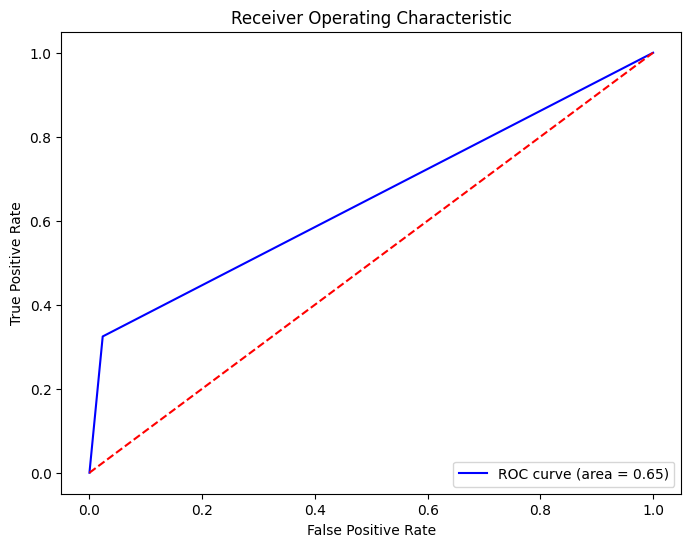

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred_prob = model.predict_proba(merged_df_test)[:, 1]  # Probability of the positive class
y_pred_prob

array([0.01101115, 0.02455924, 0.16833619, ..., 0.02265093, 0.00934073,
       0.01806447])

# feature_importances

In [ ]:
feature_importances = best_model.feature_importances_
indices = np.argsort(feature_importances)[::-1]

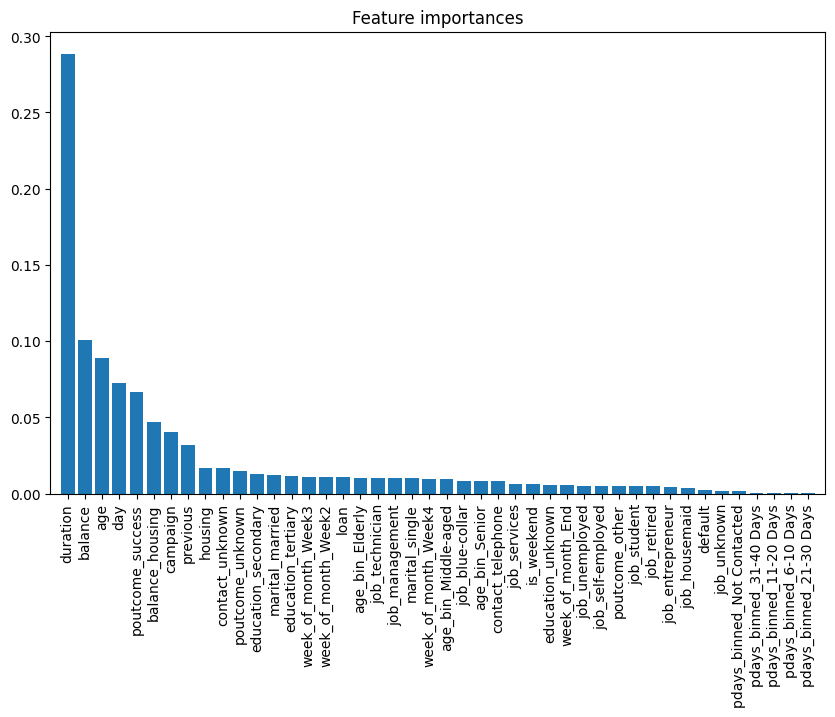

In [ ]:
plt.figure(figsize=(10, 6))
plt.title("Feature importances")
plt.bar(range(merged_df_train.shape[1]), feature_importances[indices], align="center")
plt.xticks(range(merged_df_train.shape[1]), merged_df_train.columns[indices], rotation=90)
plt.xlim([-1, merged_df_train.shape[1]])
plt.show()

In [ ]:
feature_importances_top = pd.Series(feature_importances, index=merged_df_train.columns).sort_values(ascending=False)
feature_importances_top = feature_importances_top.head(10)
feature_importances_top

duration            0.288692
balance             0.100816
age                 0.089161
day                 0.072696
poutcome_success    0.066432
balance_housing     0.046895
campaign            0.040209
previous            0.031609
housing             0.016752
contact_unknown     0.016734
dtype: float64

# Applying SMOTE
It is a popular technique used to handle class imbalance in classification problems. It creates synthetic samples of the minority class to balance the dataset, helping the model to avoid biases toward the majority class.

In [ ]:
# !pip install imbalanced-learn

In [ ]:

from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(merged_df_train, y_train)

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_resampled, y_resampled)

RandomForestClassifier(random_state=42)

In [ ]:
y_pred = model.predict(merged_df_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.79      0.86      7952
           1       0.32      0.73      0.44      1091

    accuracy                           0.78      9043
   macro avg       0.64      0.76      0.65      9043
weighted avg       0.88      0.78      0.81      9043



# XGBClassifier

In [ ]:
! pip install xgboost

In [ ]:
from xgboost import XGBClassifier

In [ ]:
model_xg = XGBClassifier(random_state=42)
model_xg.fit(X_resampled, y_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [ ]:
y_pred = model_xg.predict(merged_df_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.60      0.74      7952
           1       0.23      0.87      0.36      1091

    accuracy                           0.63      9043
   macro avg       0.60      0.73      0.55      9043
weighted avg       0.88      0.63      0.69      9043



# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0]
}

# Initialize the classifier
xgb = XGBClassifier(random_state=42)

# Perform Randomized Search
random_search = RandomizedSearchCV(xgb, param_distributions=param_grid, n_iter=10, scoring='roc_auc', cv=5, random_state=42)
random_search.fit(merged_df_train, y_train)

# Get the best parameters and AUC score
print("Best Parameters:", random_search.best_params_)
print("Best AUC Score:", random_search.best_score_)

Best Parameters: {'subsample': 0.6, 'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1}
Best AUC Score: 0.9078026860043513


In [ ]:
y_pred = random_search.predict(merged_df_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.42      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



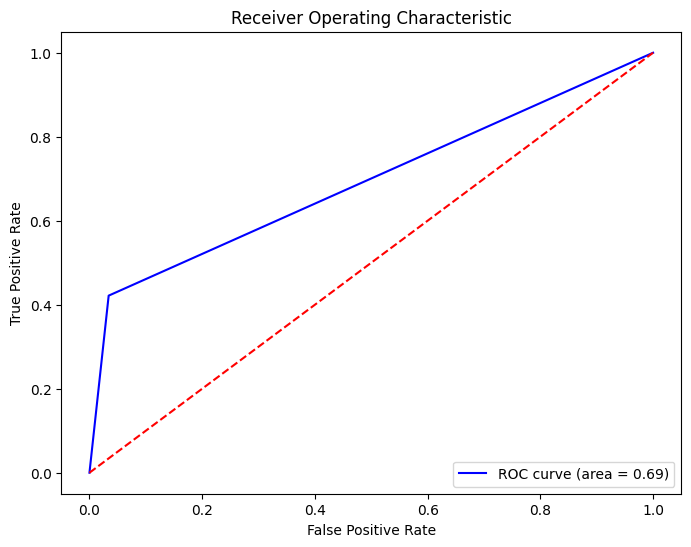

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Algorithm Selection and Stacking

Algorithm selection involves testing various models to find the one that performs best. Stacking combines predictions from multiple models to create a meta-model that usually performs better than individual models.

In [ ]:
from sklearn.ensemble import StackingClassifier

# Define base learners and meta-model
base_learners = [
    ('xgb', XGBClassifier(n_estimators=100, max_depth=5, random_state=42)),
    ('rf', RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42))
]
meta_model = LogisticRegression()

# Define the stacking model
stacking_clf = StackingClassifier(estimators=base_learners, final_estimator=meta_model)

# Train the stacking model
stacking_clf.fit(merged_df_train, y_train)

# Predict and calculate AUC
y_pred_proba = stacking_clf.predict_proba(merged_df_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("Stacked Model AUC:", auc_score)


Stacked Model AUC: 0.9024995527703342


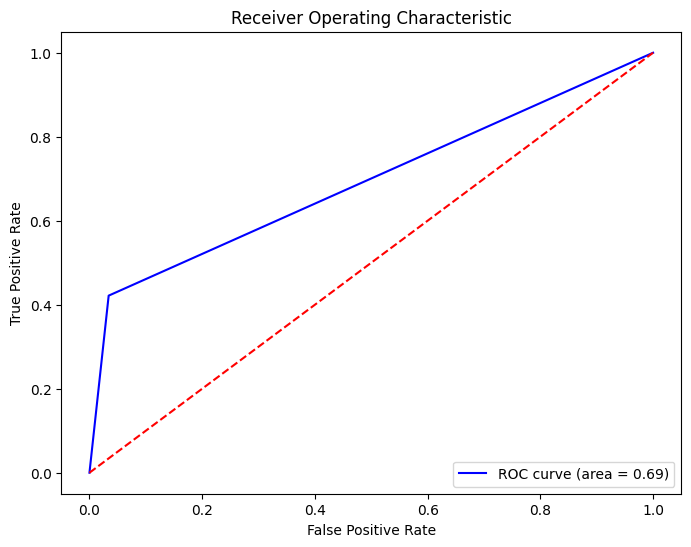

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Training model using selected features only using RFE

In [ ]:
from sklearn.feature_selection import RFE

# Initialize RFE with a base estimator
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=5)
rfe.fit(merged_df_train, y_train)

RFE(estimator=LogisticRegression(), n_features_to_select=5)

In [ ]:
# Selected features
selected_features = merged_df_train.columns[rfe.support_]
print("Selected Features:", selected_features)


Selected Features: Index(['duration', 'contact_unknown', 'poutcome_success',
       'age_bin_Middle-aged', 'age_bin_Senior'],
      dtype='object')


In [ ]:
# Train model using selected features only
X_train_selected = rfe.transform(merged_df_train)
X_test_selected = rfe.transform(merged_df_test)
clf = LogisticRegression().fit(X_train_selected, y_train)
y_pred_proba = clf.predict_proba(X_test_selected)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print("AUC with Selected Features:", auc_score)


AUC with Selected Features: 0.8717798311408322


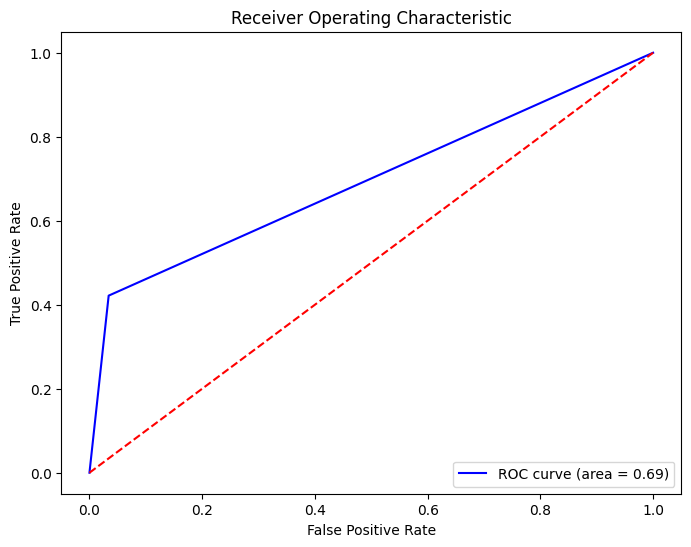

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# L1 Regularization (Lasso)

In [ ]:
# L1 Regularization (Lasso)
logreg_l1 = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
logreg_l1.fit(merged_df_train, y_train)
y_pred = logreg_l1.predict_proba(merged_df_test)[:, 1]
auc_score_l1 = roc_auc_score(y_test, y_pred)
print("L1 Regularized AUC:", auc_score_l1)


L1 Regularized AUC: 0.8928893018975449


In [ ]:
y_pred = random_search.predict(merged_df_test)
print(classification_report(y_test, y_pred))

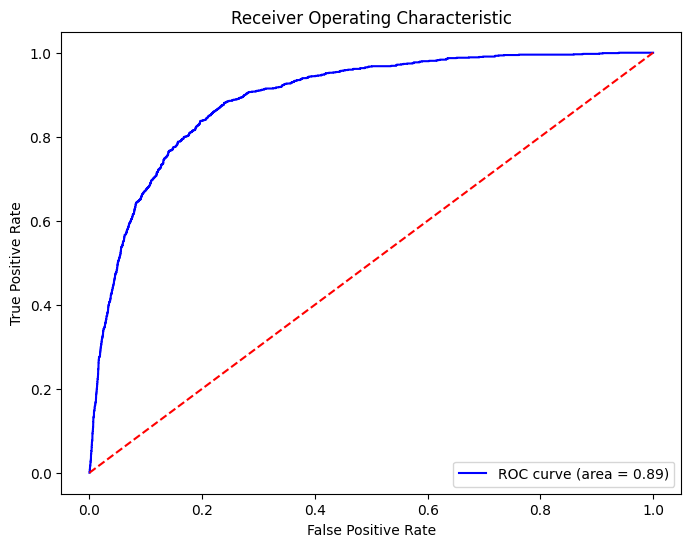

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# L2 Regularization (Ridge)

In [ ]:
# L2 Regularization (Ridge)
logreg_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)
logreg_l2.fit(merged_df_train, y_train)
y_pred = logreg_l2.predict_proba(merged_df_test)[:, 1]
auc_score_l2 = roc_auc_score(y_test, y_pred)
print("L2 Regularized AUC:", auc_score_l2)

L2 Regularized AUC: 0.8937012312186592


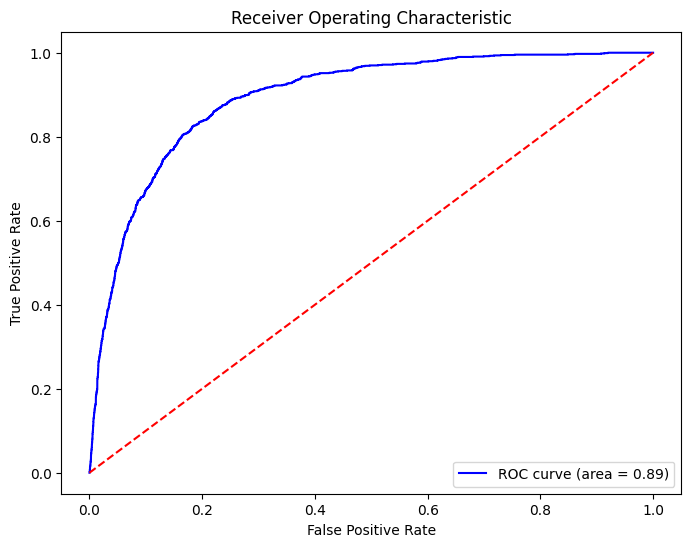

In [ ]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_pred)

# Plotting the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (area = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Diagonal line for random guess
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

In [ ]:
y_pred = random_search.predict(merged_df_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.63      0.42      0.50      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.69      0.72      9043
weighted avg       0.89      0.90      0.89      9043



# Saving

In [ ]:
#df.to_csv('preprocessed_data.csv', index=False)
# SAVING FOR DASHBOARD